<a target="_blank" href="https://colab.research.google.com/github/sonder-art/automl_o24/blob/main/ejercicios/03_limits_of_linear_regression.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Introduction to Interpolation, Extrapolation, and Linear Regression

This notebook is designed to help you understand the concepts of interpolation, extrapolation, and linear regression using Python. 
We'll be using synthetic data as well as real-world examples to illustrate these concepts.


# Introduccion a ML

## Librerias

In [13]:
import numpy as np
import pandas as pd
# ### Graficas
import matplotlib.pyplot as plt
import seaborn as sns

# ### Regresion Lineal
from sklearn import datasets, linear_model

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(16,6)})

## Funcion de graficacion y regresion lineal

In [14]:
def foo_regresion(X, Y, print_coefficients=False, mean=True, median=True):
    # Configurar el tamaño de los gráficos usando Seaborn
    sns.set(rc={'figure.figsize': (18, 8)})

    # Inicializar el modelo de regresión lineal
    regression = linear_model.LinearRegression()

    # Entrenar el modelo con los datos proporcionados
    regression.fit(X, Y)

    # Realizar predicciones sobre los datos de entrada
    Y_hat = regression.predict(X)

    # Calcular el error entre las predicciones y los valores reales
    error = np.sqrt(np.square(np.subtract(Y_hat, Y)))

    # Inicializar listas para almacenar DataFrames y títulos
    dfs = []
    titles = []
    
    # Crear DataFrame para la regresión lineal
    df_regression = pd.DataFrame({
        'Y_hat': Y_hat,
        'Y': Y,
        'Error': np.subtract(Y_hat, Y)
    })
    dfs.append(df_regression)
    titles.append('Regression')

    if mean:
        # Calcular la media de Y y las predicciones usando la media
        Y_mean = np.mean(Y)
        Y_hat_mean = np.full_like(Y, Y_mean)
        error_mean = np.sqrt(np.square(np.subtract(Y_hat_mean, Y)))

        # Crear DataFrame para la media
        df_mean = pd.DataFrame({
            'Y_hat': Y_hat_mean,
            'Y': Y,
            'Error': np.subtract(Y_hat_mean, Y)
        })
        dfs.append(df_mean)
        titles.append('Mean')

    if median:
        # Calcular la mediana de Y y las predicciones usando la mediana
        Y_median = np.median(Y)
        Y_hat_median = np.full_like(Y, Y_median)
        error_median = np.sqrt(np.square(np.subtract(Y_hat_median, Y)))

        # Crear un DataFrame para la mediana
        df_median = pd.DataFrame({
            'Y_hat': Y_hat_median,
            'Y': Y,
            'Error': np.subtract(Y_hat_median, Y)
        })
        dfs.append(df_median)
        titles.append('Median')

    # Gráficos para cada una de las opciones
    plt.figure(figsize=(18, len(dfs) * 6))

    for i, (df, title) in enumerate(zip(dfs, titles)):
        # 1. Actual vs Predicted
        plt.subplot(len(dfs), 3, i * 3 + 1)
        sns.scatterplot(x='Y', y='Y_hat', data=df)
        plt.plot(df['Y'], df['Y'], color='red')  # Línea de referencia para comparación
        plt.title(f'Scatter Plot: Predicted vs Actual ({title})')
        plt.xlabel('Actual Y')
        plt.ylabel(f'Predicted Y ({title})')

        # 2. Histogram of Errors
        plt.subplot(len(dfs), 3, i * 3 + 2)
        sns.histplot(df['Error'], kde=True)
        plt.title(f'Histogram of Prediction Errors ({title})')
        plt.xlabel('Error')
        plt.ylabel('Frequency')

        # 3. Error vs Actual
        plt.subplot(len(dfs), 3, i * 3 + 3)
        sns.scatterplot(x='Y', y='Error', data=df)
        plt.title(f'Scatter Plot: Error vs Actual Y ({title})')
        plt.xlabel('Actual Y')
        plt.ylabel(f'Error ({title})')

    # Ajustar el layout y mostrar los gráficos
    plt.tight_layout()
    plt.show()

    # Imprimir la raíz del error cuadrático medio (RMSE) de la predicción
    print(f'RMSE of prediction (Regression): {np.abs(error).mean()}')

    if mean:
        print(f'RMSE of prediction (Mean): {np.abs(error_mean).mean()}')
    if median:
        print(f'RMSE of prediction (Median): {np.abs(error_median).mean()}')

    # Opcionalmente, imprimir los coeficientes de la regresión si se solicita
    if print_coefficients:
        print(f'Regression coefficients: {regression.coef_}')
        print(f'Intercept: {regression.intercept_}')


## DataFrame de Pandas

Un DataFrame de Pandas es una estructura de datos bidimensional, esencialmente una tabla, que es muy similar a una hoja de cálculo o una tabla SQL. Es una de las herramientas más fundamentales y poderosas en Python para el análisis y la manipulación de datos. Aquí hay una breve explicación de sus características y funcionalidades clave:

    1.Estructura Tabular: Un DataFrame se organiza en filas y columnas, lo que facilita la visualización y manipulación de datos. Cada fila representa un registro (o punto de datos), y cada columna representa una característica o variable.

    2.Etiquetas de Eje: A diferencia de las matrices o matrices en otros lenguajes de programación, cada fila y columna en un DataFrame de Pandas puede tener una etiqueta. Esto significa que puedes acceder a los datos por sus etiquetas de fila (índices) y columna (nombres de columna), lo que hace que el código sea más legible y fácil de trabajar.

    3.Diversidad de Tipos de Datos: Un DataFrame puede contener múltiples tipos de datos diferentes (como int, float, string, etc.). Esto es útil cuando se trabaja con datos del mundo real que suelen ser una mezcla de diferentes tipos.

    4.Manipulación de Datos: Pandas proporciona una amplia gama de herramientas para manipular DataFrames, que incluyen la capacidad de filtrar datos, realizar operaciones de agrupación, fusionar y unir diferentes conjuntos de datos, manejar datos faltantes, entre otras.

    5.Análisis de Datos: Con Pandas, puedes realizar análisis de datos complejos y operaciones estadísticas. Esto incluye agrupaciones, cálculos de resúmenes estadísticos, pivotado de tablas, etc.

    6.Entrada/Salida Eficiente: Pandas facilita la carga y el almacenamiento de datos desde y hacia diferentes formatos de archivo como CSV, Excel, bases de datos SQL, archivos JSON, entre otros.

Lo puedes ver como una tabla de excel

In [15]:
import pandas as pd

# Crear un DataFrame
data = {'Name': ['Anna', 'Bob', 'Charles'],
        'Age': [28, 34, 29],
        'City': ['New York', 'Los Angeles', 'Chicago']}
df = pd.DataFrame(data)

print(df)


      Name  Age         City
0     Anna   28     New York
1      Bob   34  Los Angeles
2  Charles   29      Chicago


## Funcion Pairplot

Para entender los datos utilizaremos la funcion [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

La función pairplot en Seaborn, una biblioteca de visualización de datos en Python, es una herramienta muy útil para explorar rápidamente las relaciones entre múltiples variables en un conjunto de datos. Aquí está una explicación detallada de lo que hace esta función:
Funcionalidad Básica

    Visualización de Pares de Variables: pairplot crea una cuadrícula de ejes de modo que cada variable en los datos se compara con todas las demás. Por ejemplo, si tienes un conjunto de datos con tres variables A, B y C, pairplot generará una cuadrícula 3x3 de gráficos.

    Diagramas de Dispersión y Histogramas: Por defecto, para cada par de variables diferentes (como A vs B), pairplot muestra un diagrama de dispersión. Para la relación de una variable consigo misma (como A vs A), muestra un histograma, que es una manera de visualizar la distribución de una sola variable.

# Simulaciones

## Modelos Lineales 

### Sin error/incertidumbre

$y = x_1 - 3x_2 + 4x_3$

In [16]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
X = np.random.normal(size=(N,3))
# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4]))

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y

df.head()

x1        x2        x3         y
0  1.109430  0.592715  0.822370  2.620763
1  0.738192  0.974556 -1.086094 -6.529854
2 -0.626169  0.326165 -1.863696 -9.059448
3 -0.059622 -1.717557 -1.123209  0.600214
4  1.708615  0.289967  0.127948  1.350506

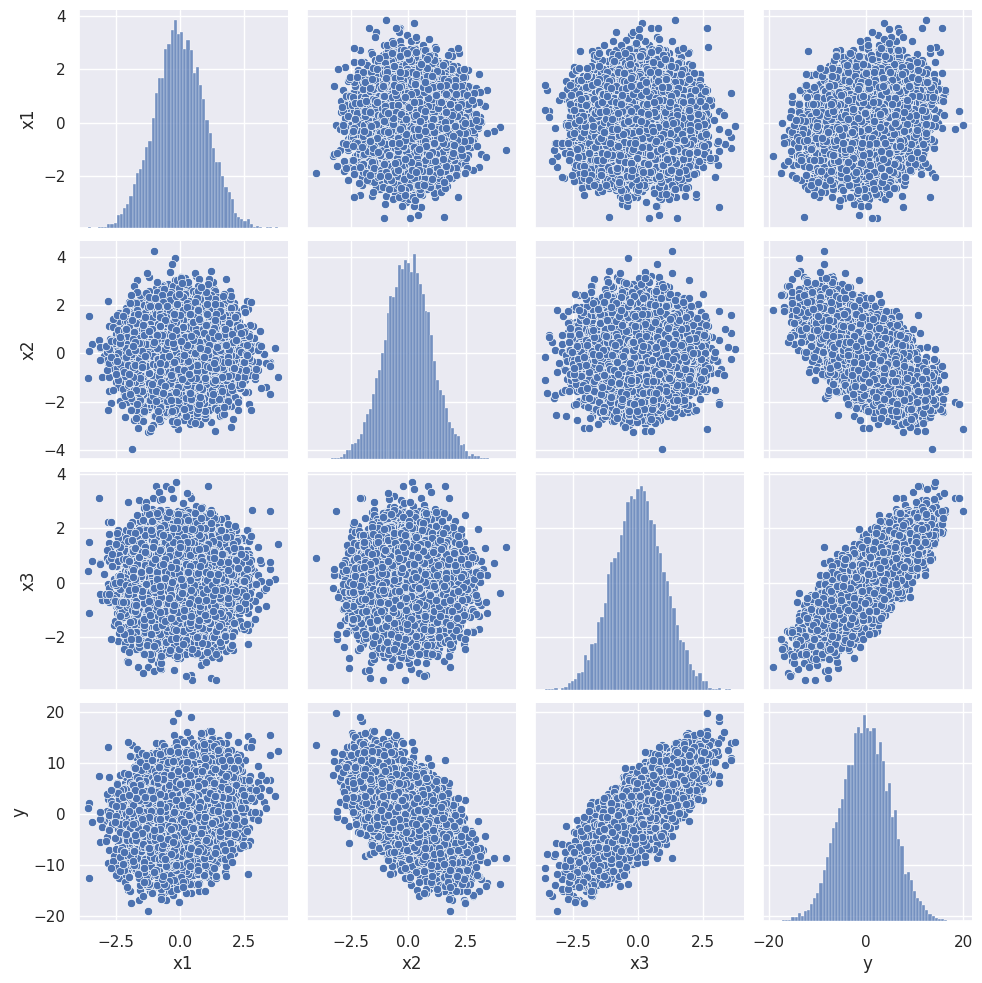

In [17]:
sns.pairplot(df)

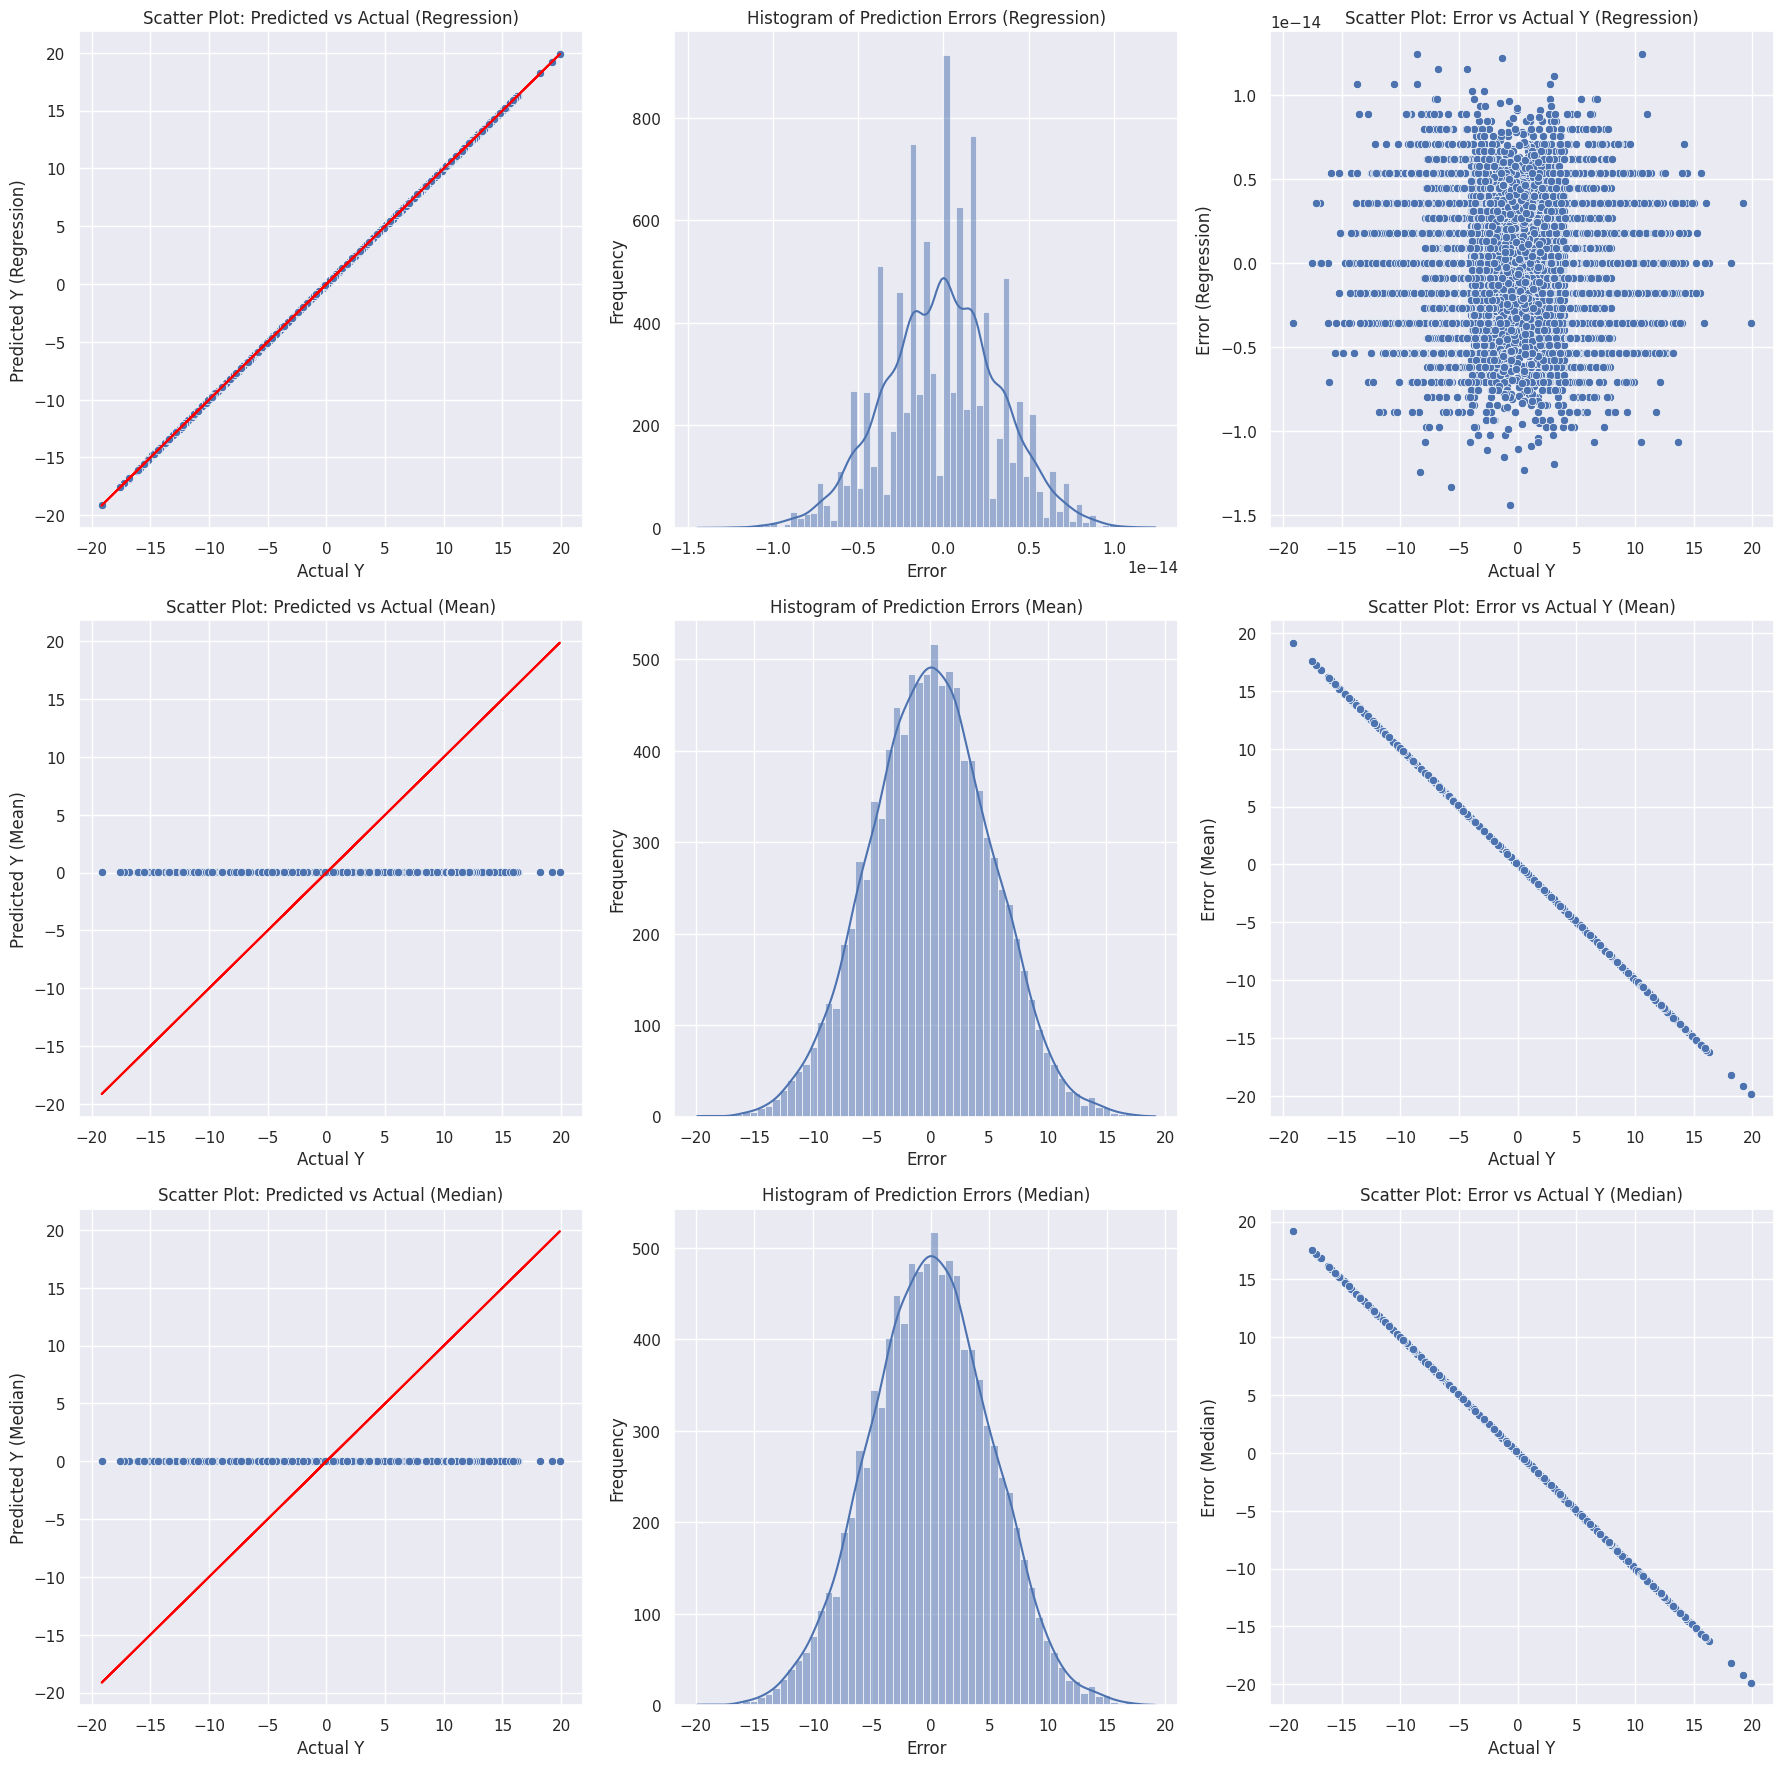

RMSE of prediction (Regression): 2.661889544235737e-15
RMSE of prediction (Mean): 4.10844428430618
RMSE of prediction (Median): 4.108425790398211
Regression coefficients: [ 1. -3.  4.]
Intercept: -1.249000902703301e-16


In [18]:
foo_regresion(X,Y, True, mean=True, median=True)

### Con error/incertidumbre

$y = x_1 - 3x_2 + 4x_3 + \epsilon$

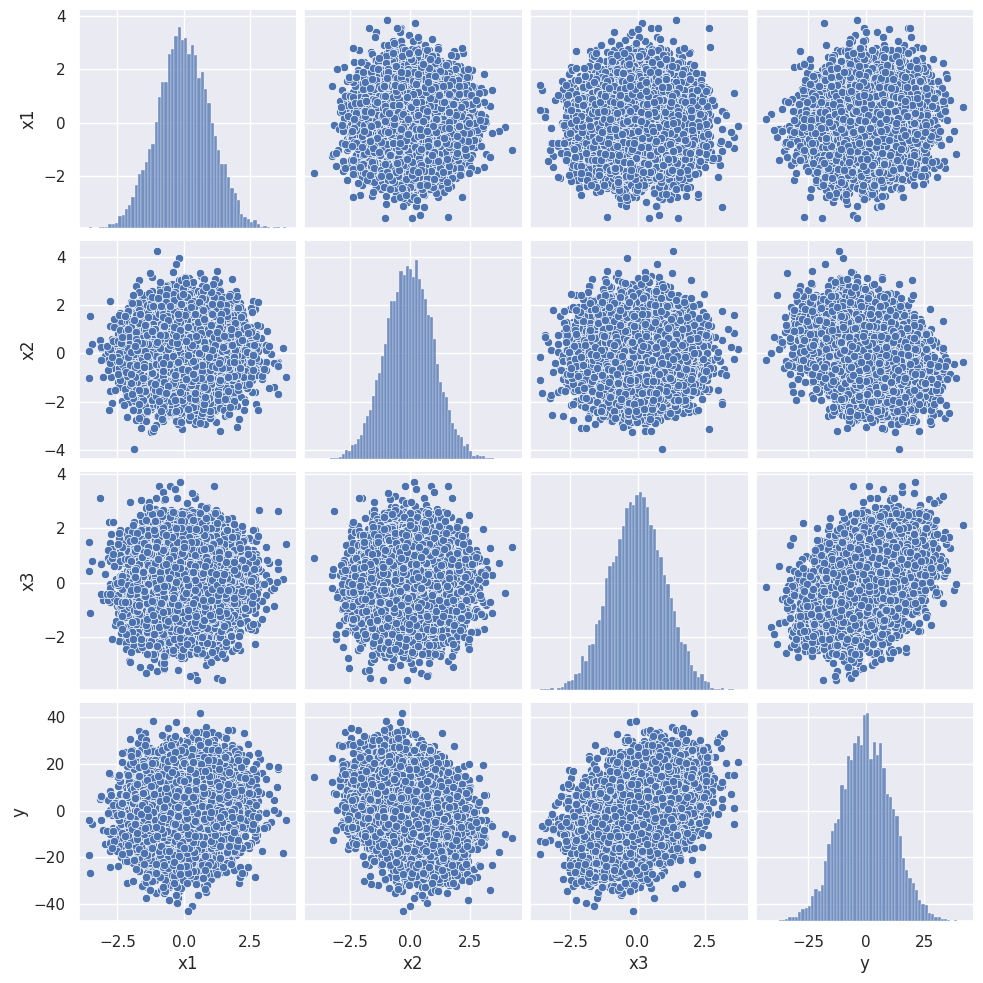

In [19]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000

# Matriz de Diseño
X = np.random.normal(size=(N,3))
eps = np.random.normal(0,10, size=(N,1))

# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4])).reshape((N,1)) + eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y
sns.pairplot(df)

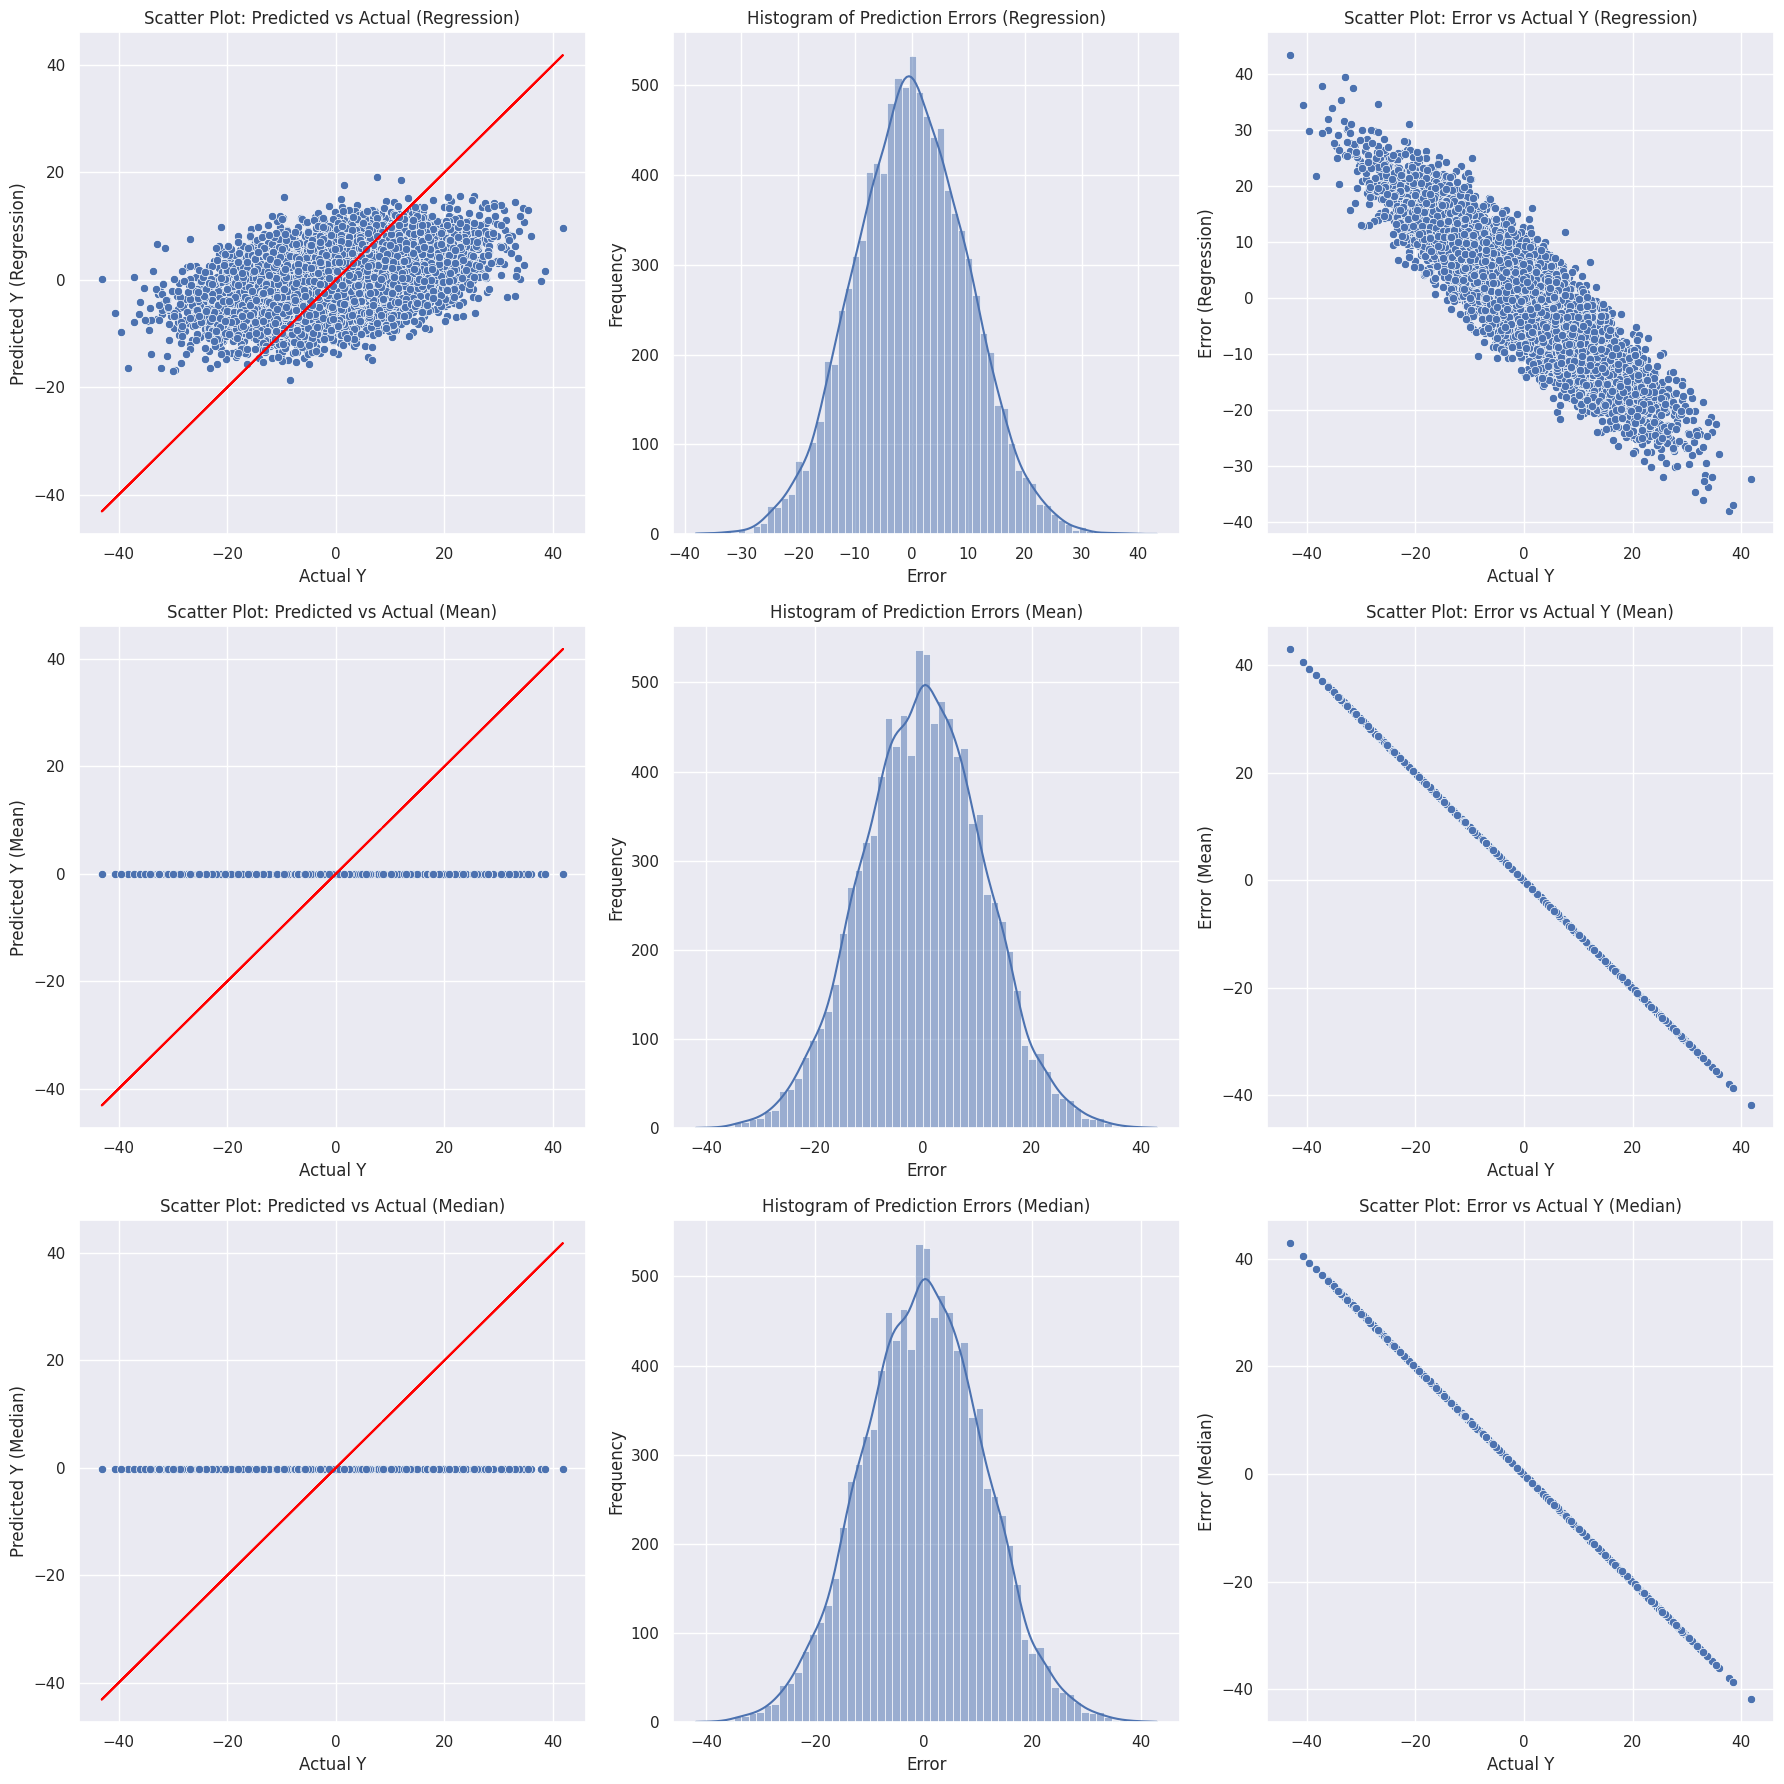

RMSE of prediction (Regression): 7.947282459365102
RMSE of prediction (Mean): 8.898840499137206
RMSE of prediction (Median): 8.898668345927488
Regression coefficients: [ 0.9121978  -2.90595836  3.89412335]
Intercept: -0.09854484630884382


In [20]:
foo_regresion(X,Y,True)

## Modelos no Lineales

### Sin error/incertidumbre

y = $ \frac{1}{x}$

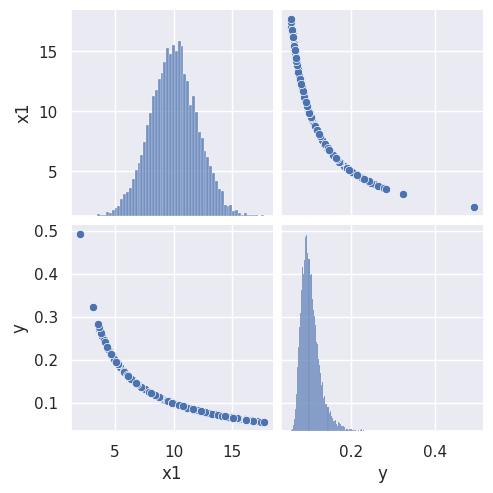

In [21]:
sns.set(rc={'figure.figsize':(16,6)})
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
X = np.random.normal(10,2,size=(N,1))
# Simulacion de Y
Y = 1/X 
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

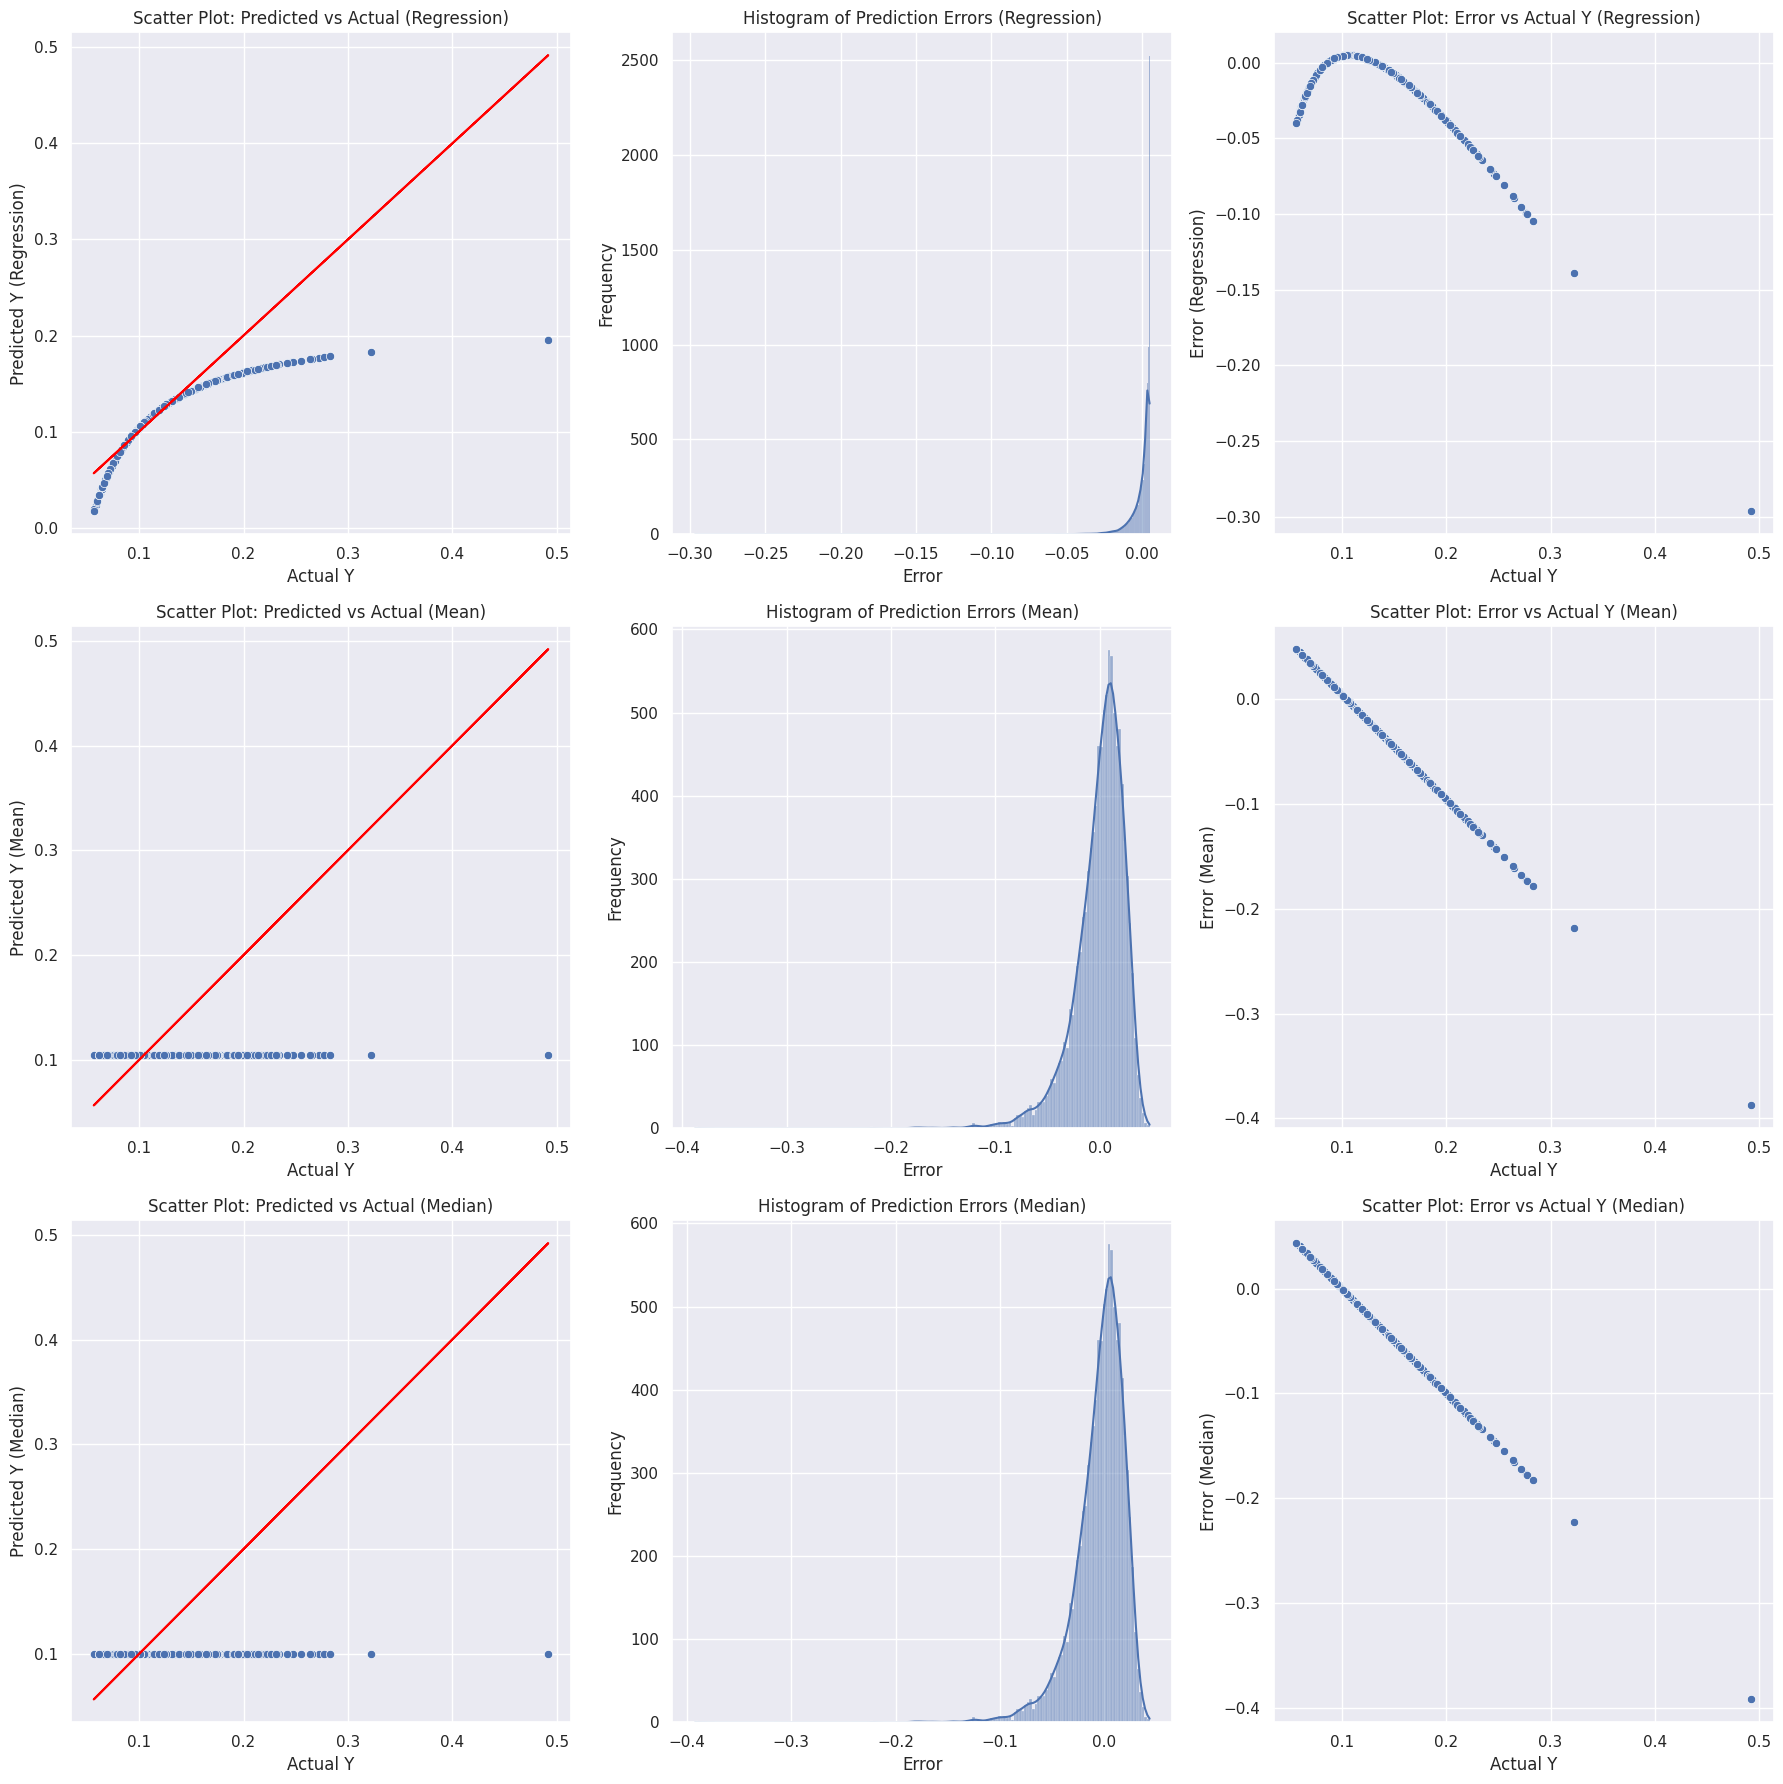

RMSE of prediction (Regression): 0.004877889744706421
RMSE of prediction (Mean): 0.017753764151597223
RMSE of prediction (Median): 0.01735636196751674
Regression coefficients: [-0.01140351]
Intercept: 0.2186233503662357


In [22]:
foo_regresion(X,Y,True)

Parece que no esta aproximando bien. **Usemos transformaciones polinomiales de X** (nuestras features o matriz de disenno) para mejorar la prediccion.

Creacion de variable X^1.5
Creacion de variable X^1.3333333333333333
Creacion de variable X^1.25
Creacion de variable X^1.2
Creacion de variable X^1.1666666666666667
Creacion de variable X^1.1428571428571428
Creacion de variable X^1.125
Creacion de variable X^1.1111111111111112
[[12.21885928 42.71161517 28.14324799 ... 17.47112046 16.70742407
  16.1365931 ]
 [11.18543016 37.40925295 25.0151774  ... 15.79283935 15.12635458
  14.62748482]
 [11.64473911 39.73696046 26.39406917 ... 16.53613521 15.82690455
  15.29637864]
 ...
 [11.67657664 39.90003729 26.49033065 ... 16.58781496 15.87559372
  15.34285389]
 [10.80422757 35.51326357 23.88498451 ... 15.17923796 14.54765317
  14.07464566]
 [12.30953003 43.18791206 28.42204327 ... 17.61936506 16.84696433
  16.26969508]]


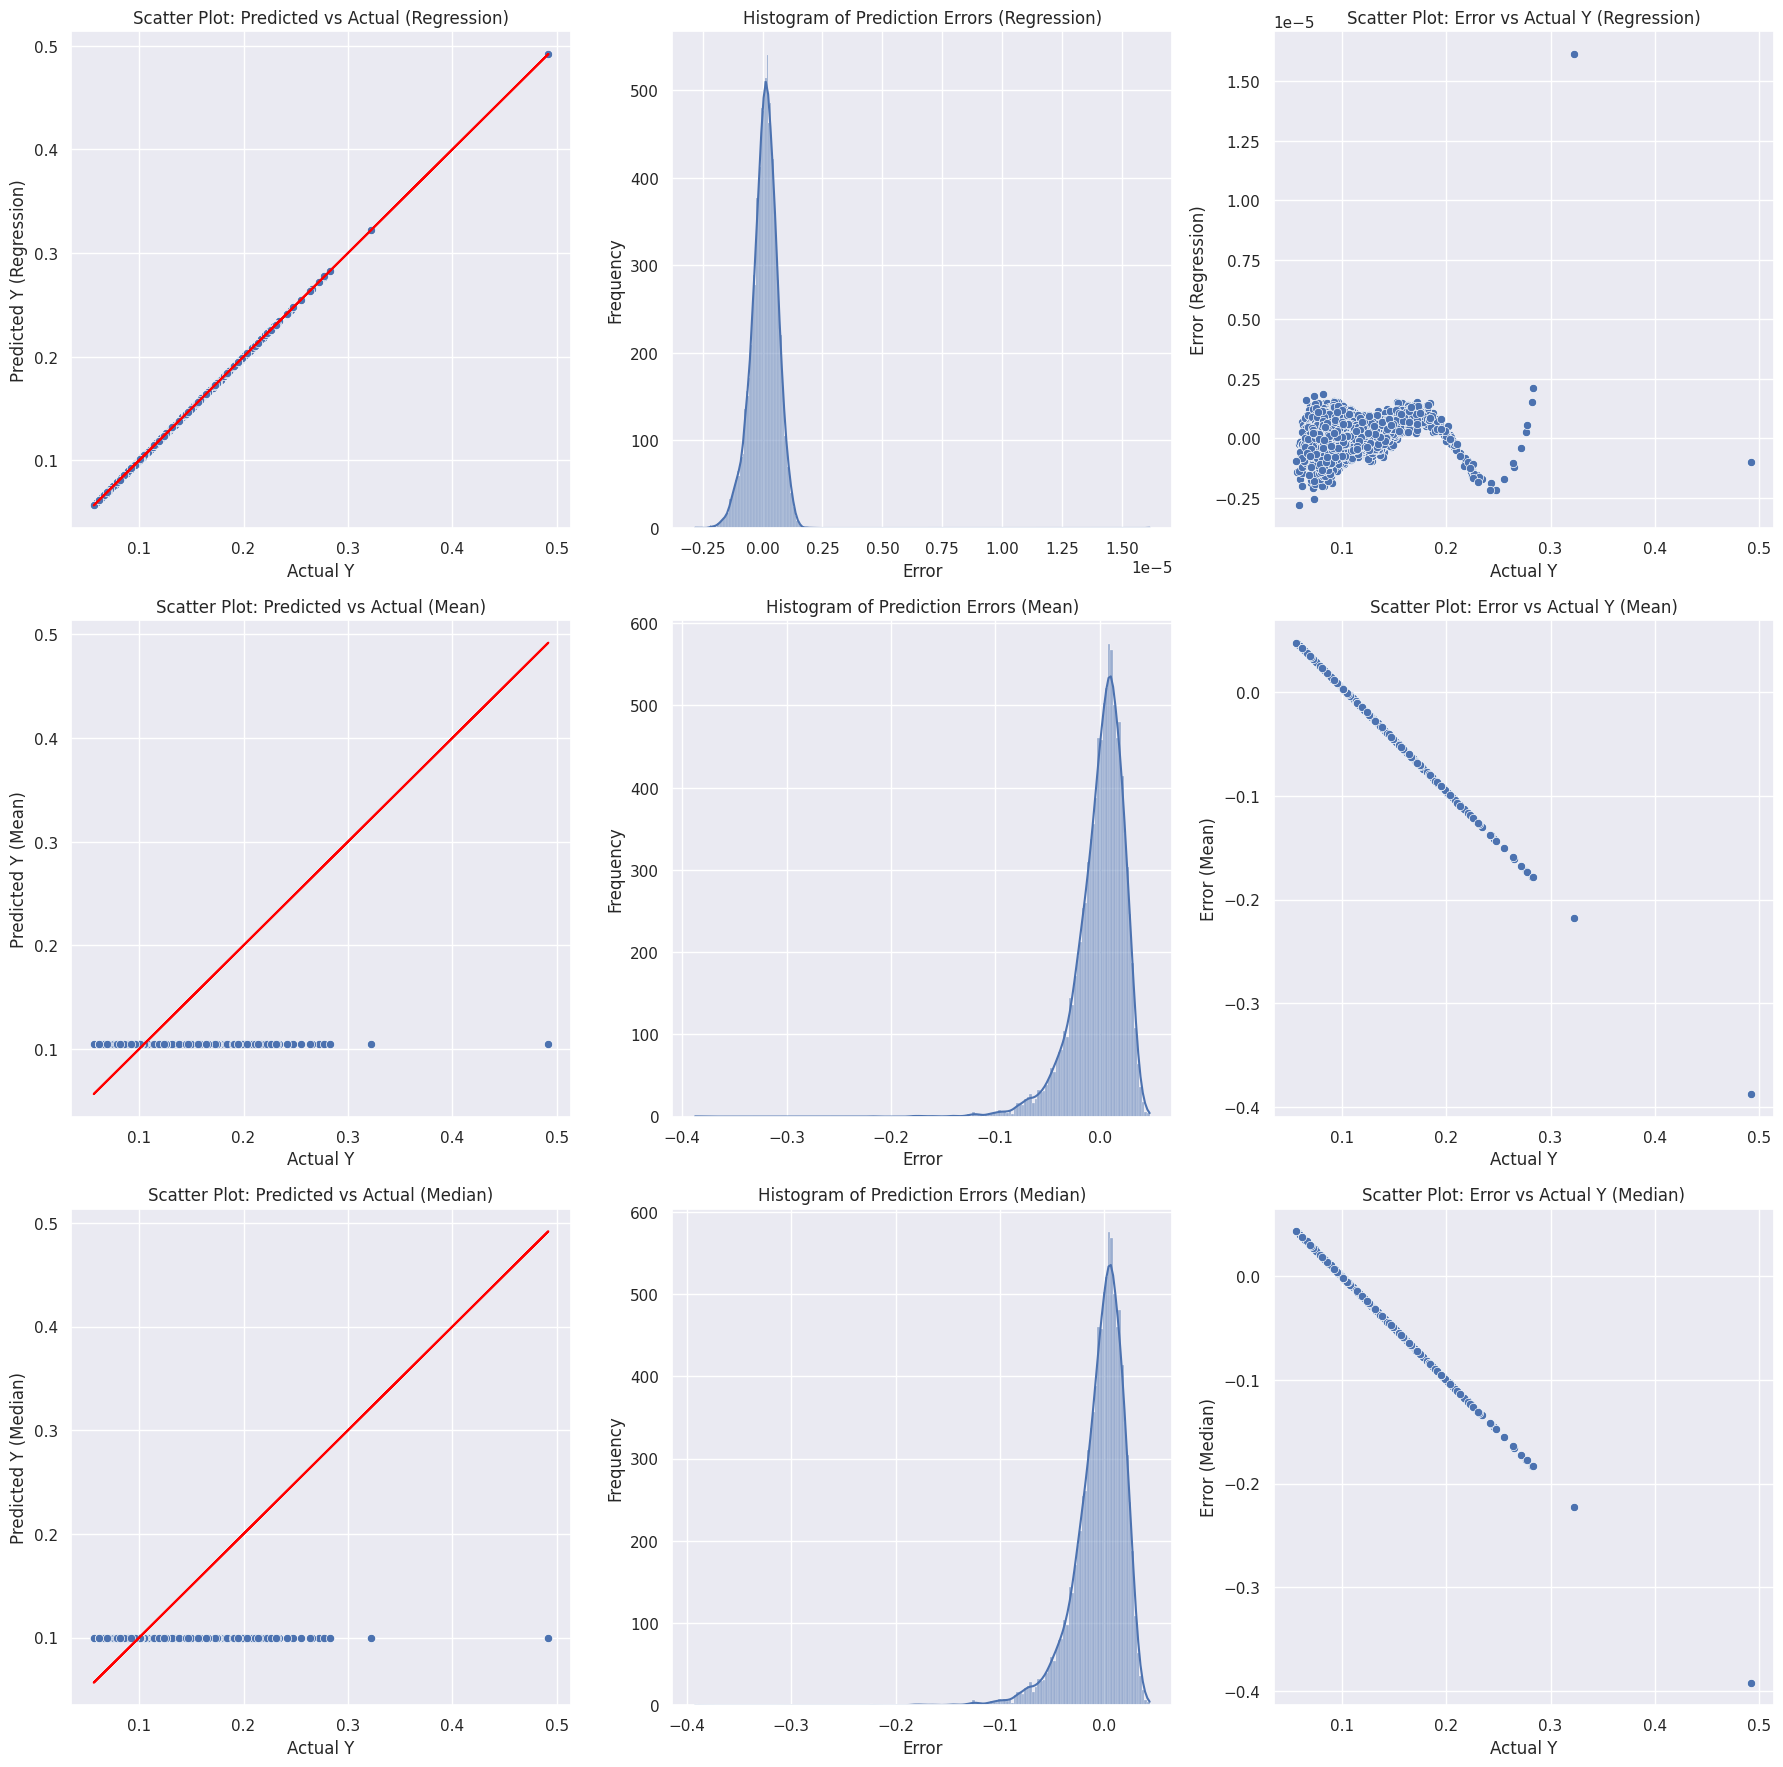

RMSE of prediction (Regression): 4.2825813873086166e-07
RMSE of prediction (Mean): 0.017753764151597223
RMSE of prediction (Median): 0.01735636196751674
Regression coefficients: [-1.64184079e+05  3.82243132e+03 -4.66569539e+05  9.15757737e+06
 -5.98845178e+07  1.70291300e+08 -2.30454072e+08  1.43317971e+08
 -3.18013448e+07]
Intercept: 17.54265511553666


In [23]:
X2 = X.copy()

# ## Feature Eng
X2 = np.reshape(X2, (N,1))
# Crea un Polinomio
for n in range(2,10):
    X2 = np.concatenate((X2,np.power(X2[:,0],1+1/n).reshape((N,1))), axis=1)
    print(f'Creacion de variable X^{1+1/n}')
print(X2)
foo_regresion(X2,Y,True)

Podemos ver que nuestro error de prediccion mejora comparado con no hacer ninguna ingenieria de variables.

Ahora salgamonos del mundo polinomial y creemos una transformacion perfecta de nuestras variables X para predecir. Esto requiere que nos salgamos del mundo del teorema de `stone-weistrass`

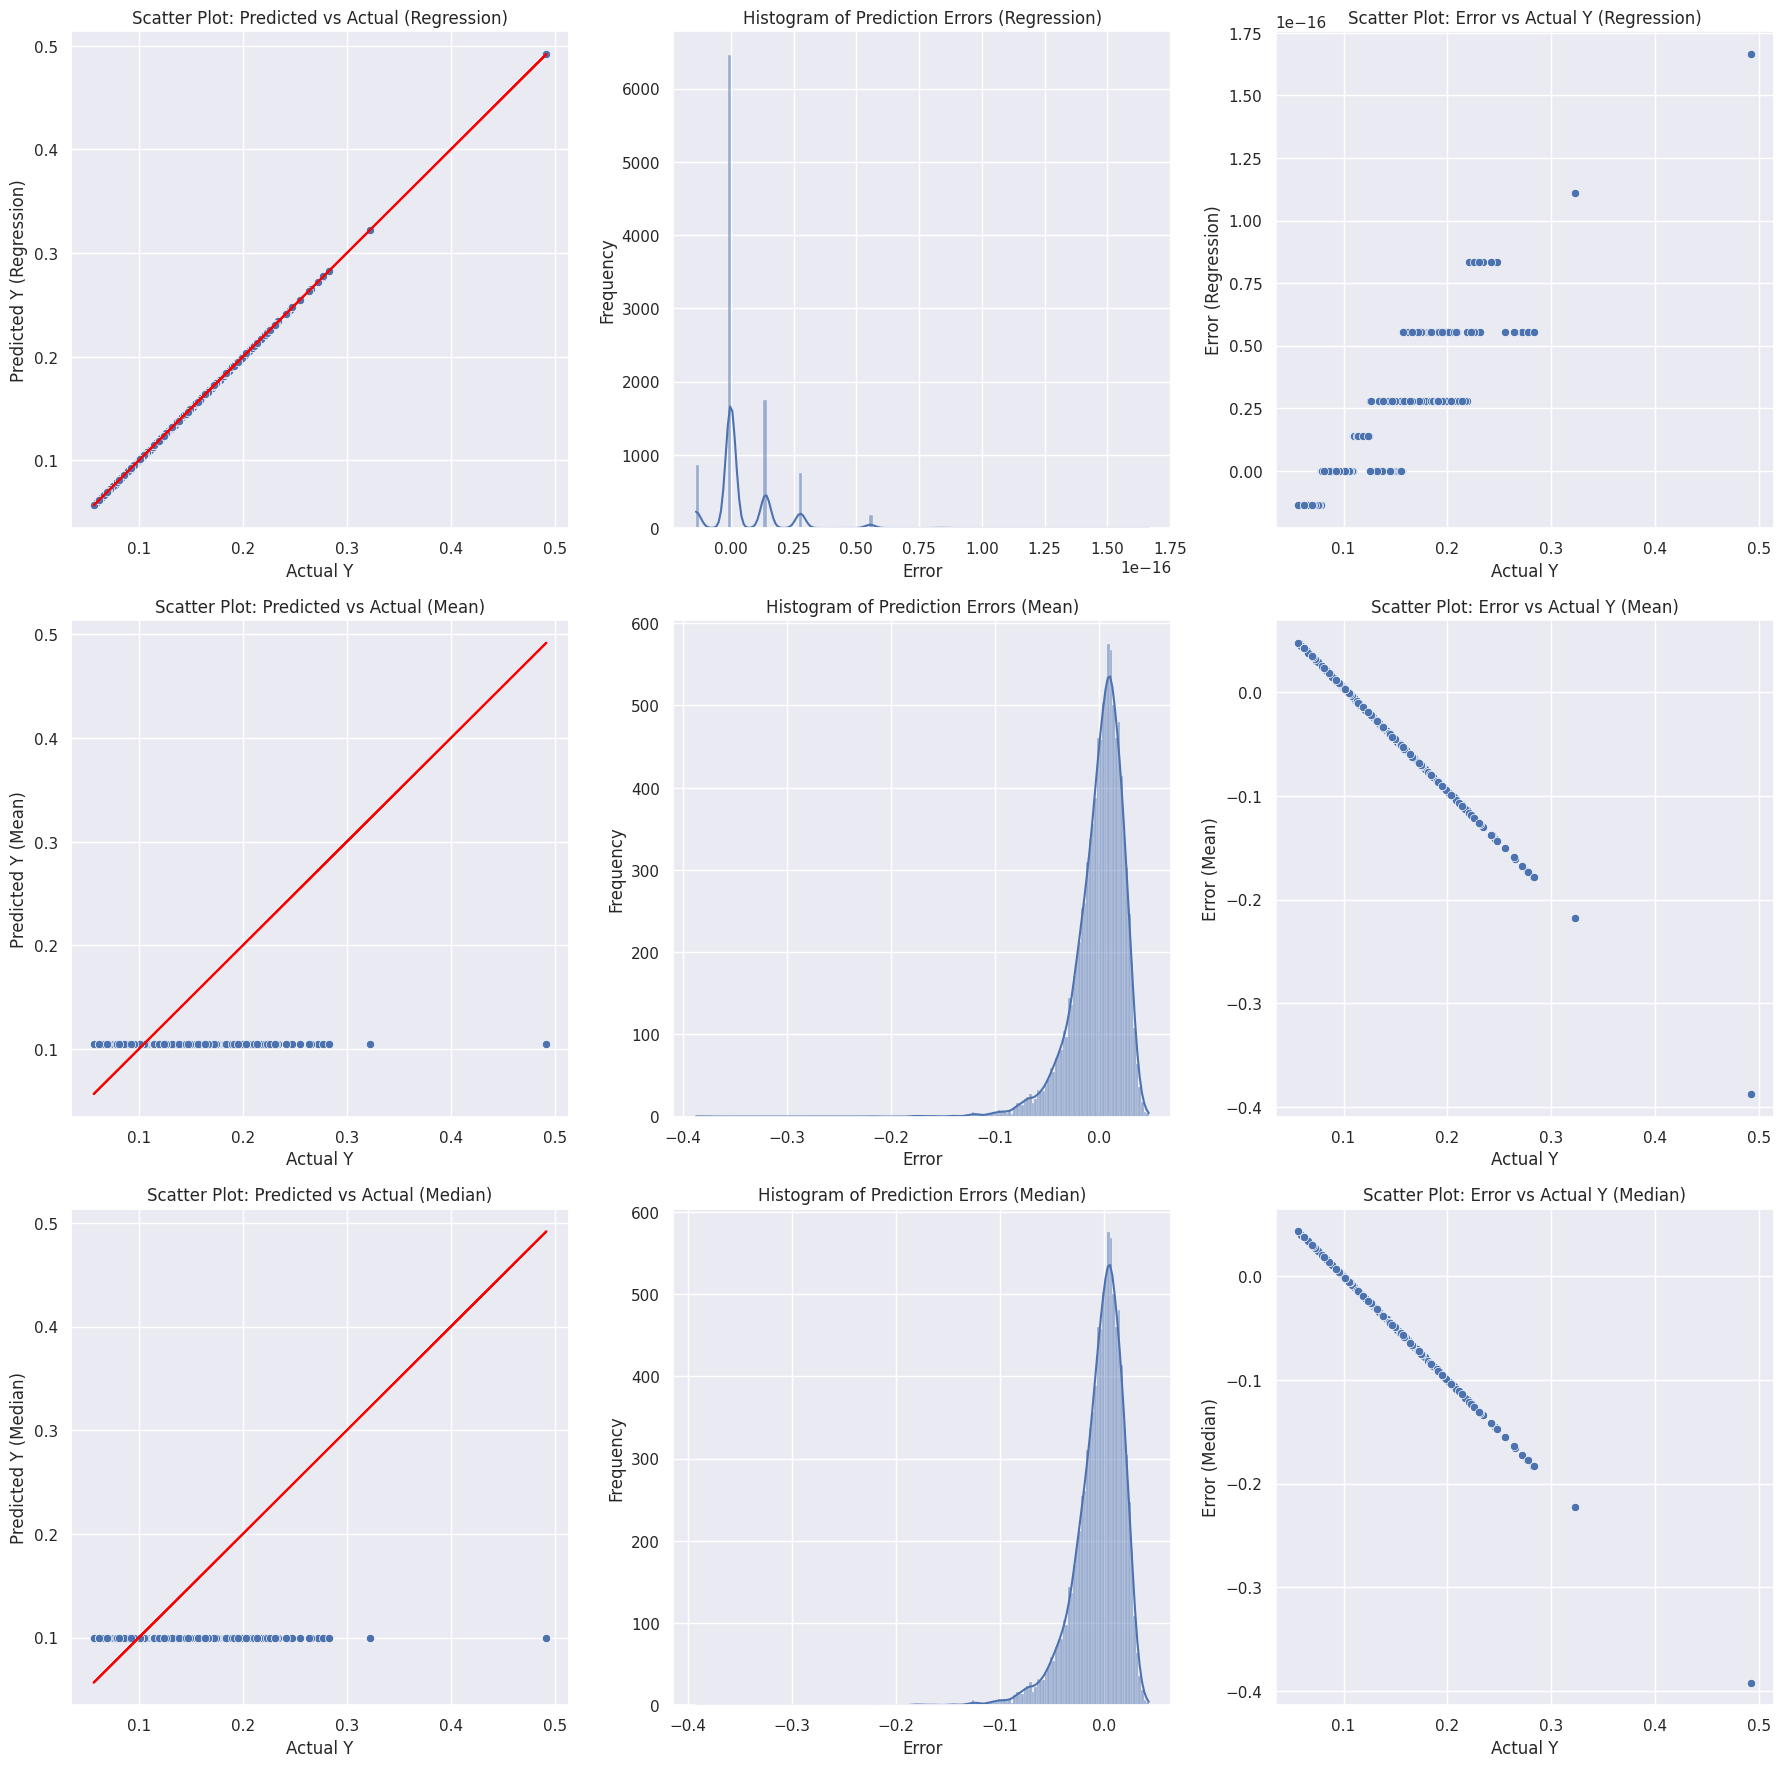

RMSE of prediction (Regression): 6.7876260168020505e-18
RMSE of prediction (Mean): 0.017753764151597223
RMSE of prediction (Median): 0.01735636196751674
Regression coefficients: [1.]
Intercept: -4.163336342344337e-17


In [24]:
X3 = X.copy()
# ## Feature Eng
X3 = 1/X3
foo_regresion(X3,Y,True)

Ahora creemos una funcion mas compleja. En la funcion anterior se veia claramente una relacion de tipo $1/x$ al graficar, pero esto no es comun en el mundo real donde tenemos decenas, cientos, miles o millones de variables que afectan a $Y$. No es facil graficar una o dos variables a la vez para ver como afectan a $Y$, ademas de que puede haber efectos cruzados/combinados. Por ello tratemos de crear una funcion compleja en la cual sea dificil adivinar la relacion exacta entre $Y$ y $X$, la idea es que sea dificil de adivinar y tengamos que recurrir a ingenieria de variables no tan perfecta o educada.

$y = x + ln(x) + xln(x) + 1/x + x^{1.3}$

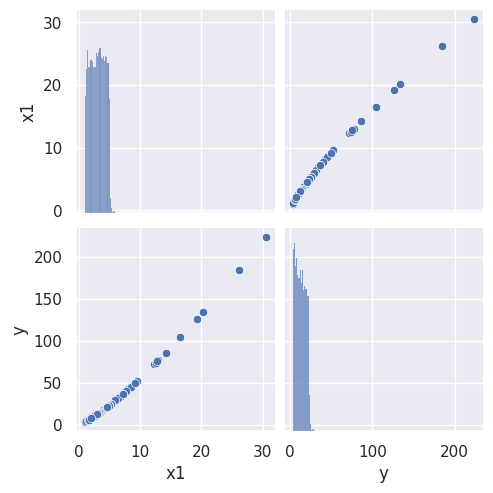

In [25]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))/100

# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3)
Y = Y.reshape(-1)


df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

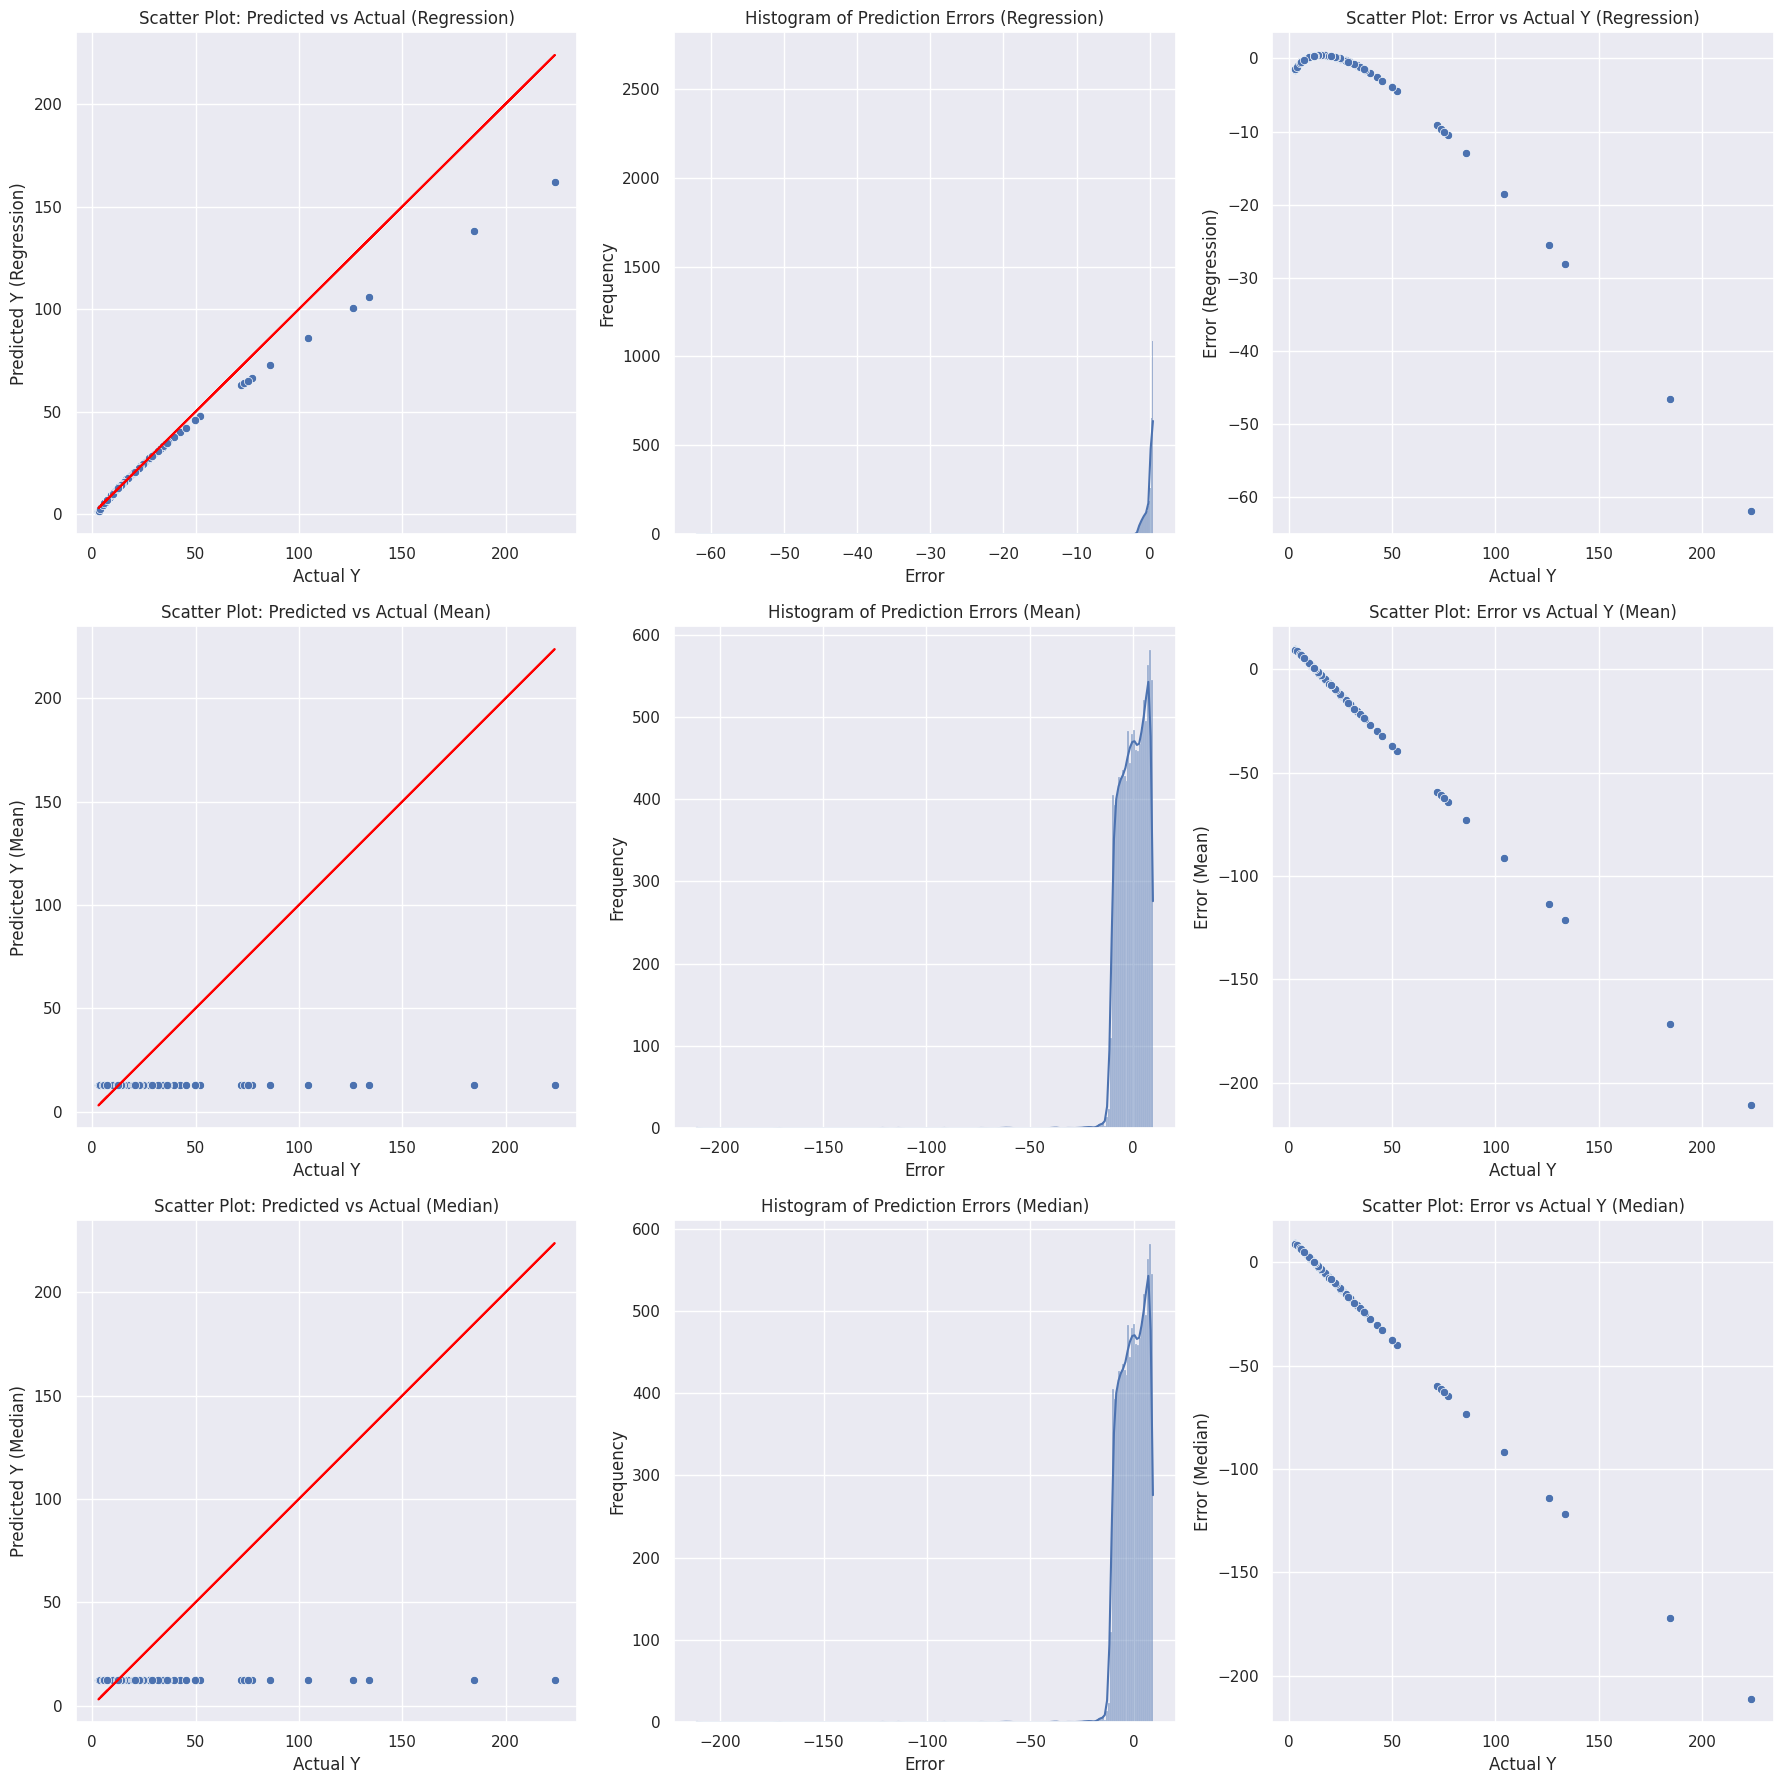

RMSE of prediction (Regression): 0.4395214198657493
RMSE of prediction (Mean): 5.232792352641124
RMSE of prediction (Median): 5.226222965186491
Regression coefficients: [5.42848563]
Intercept: -4.044135211018926


In [26]:
foo_regresion(X,Y,True)

Creacion de variable X^[1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]


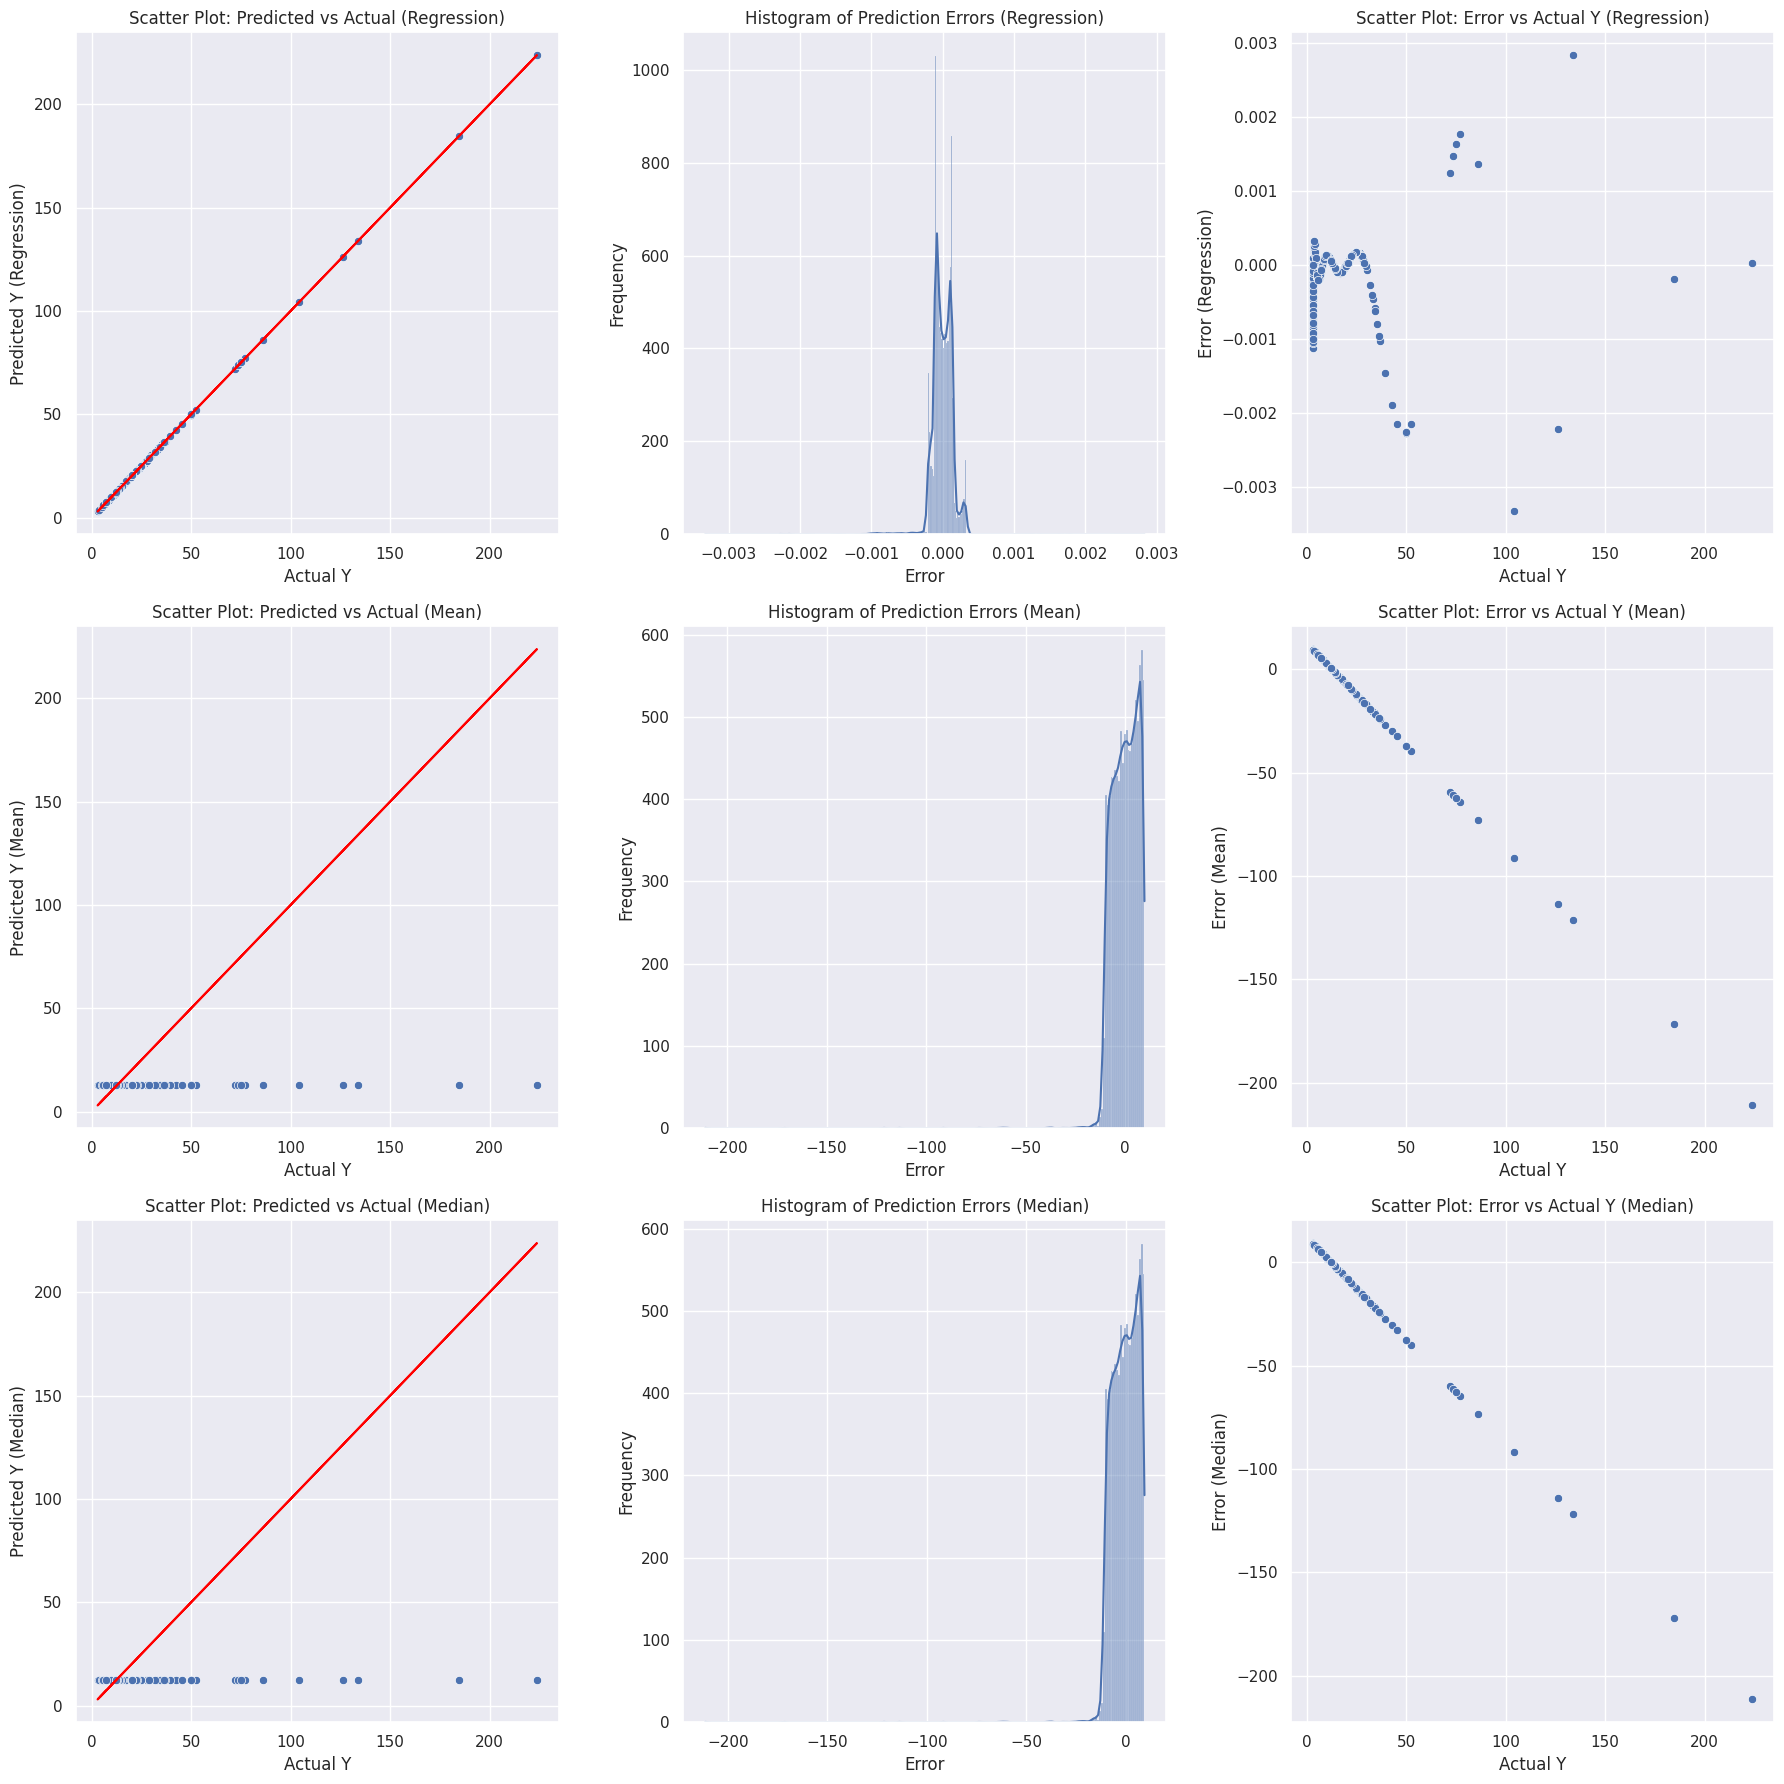

RMSE of prediction (Regression): 0.0001034800050322406
RMSE of prediction (Mean): 5.232792352641124
RMSE of prediction (Median): 5.226222965186491


In [27]:
#Ingenieria de Variables
X2 = np.reshape(X, (N,1))
# Lista para guardar exponentes del polinomio.
power = [1 + n/2 for n in range(1,10)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)

print(f'Creacion de variable X^{power}')

foo_regresion(X2,Y)

Vemos que la prediccion es decente con el polinomio, parece que es bastante bueno, pero veamos que pasa con funciones ams complejas como las periodicas.

## Funciones Periodicas

$ y = sin(x) $

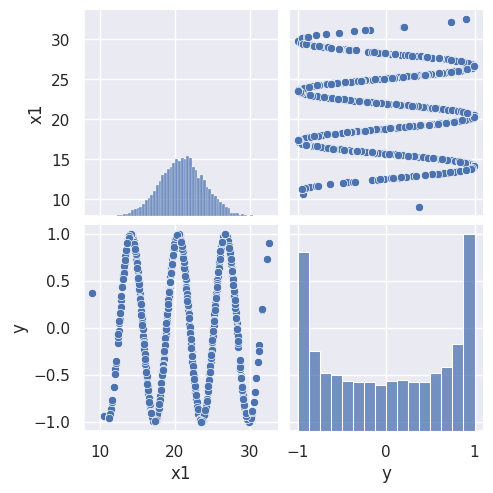

In [28]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
#X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))
X = np.random.normal(1,3,size=(N,1)) + 20
# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

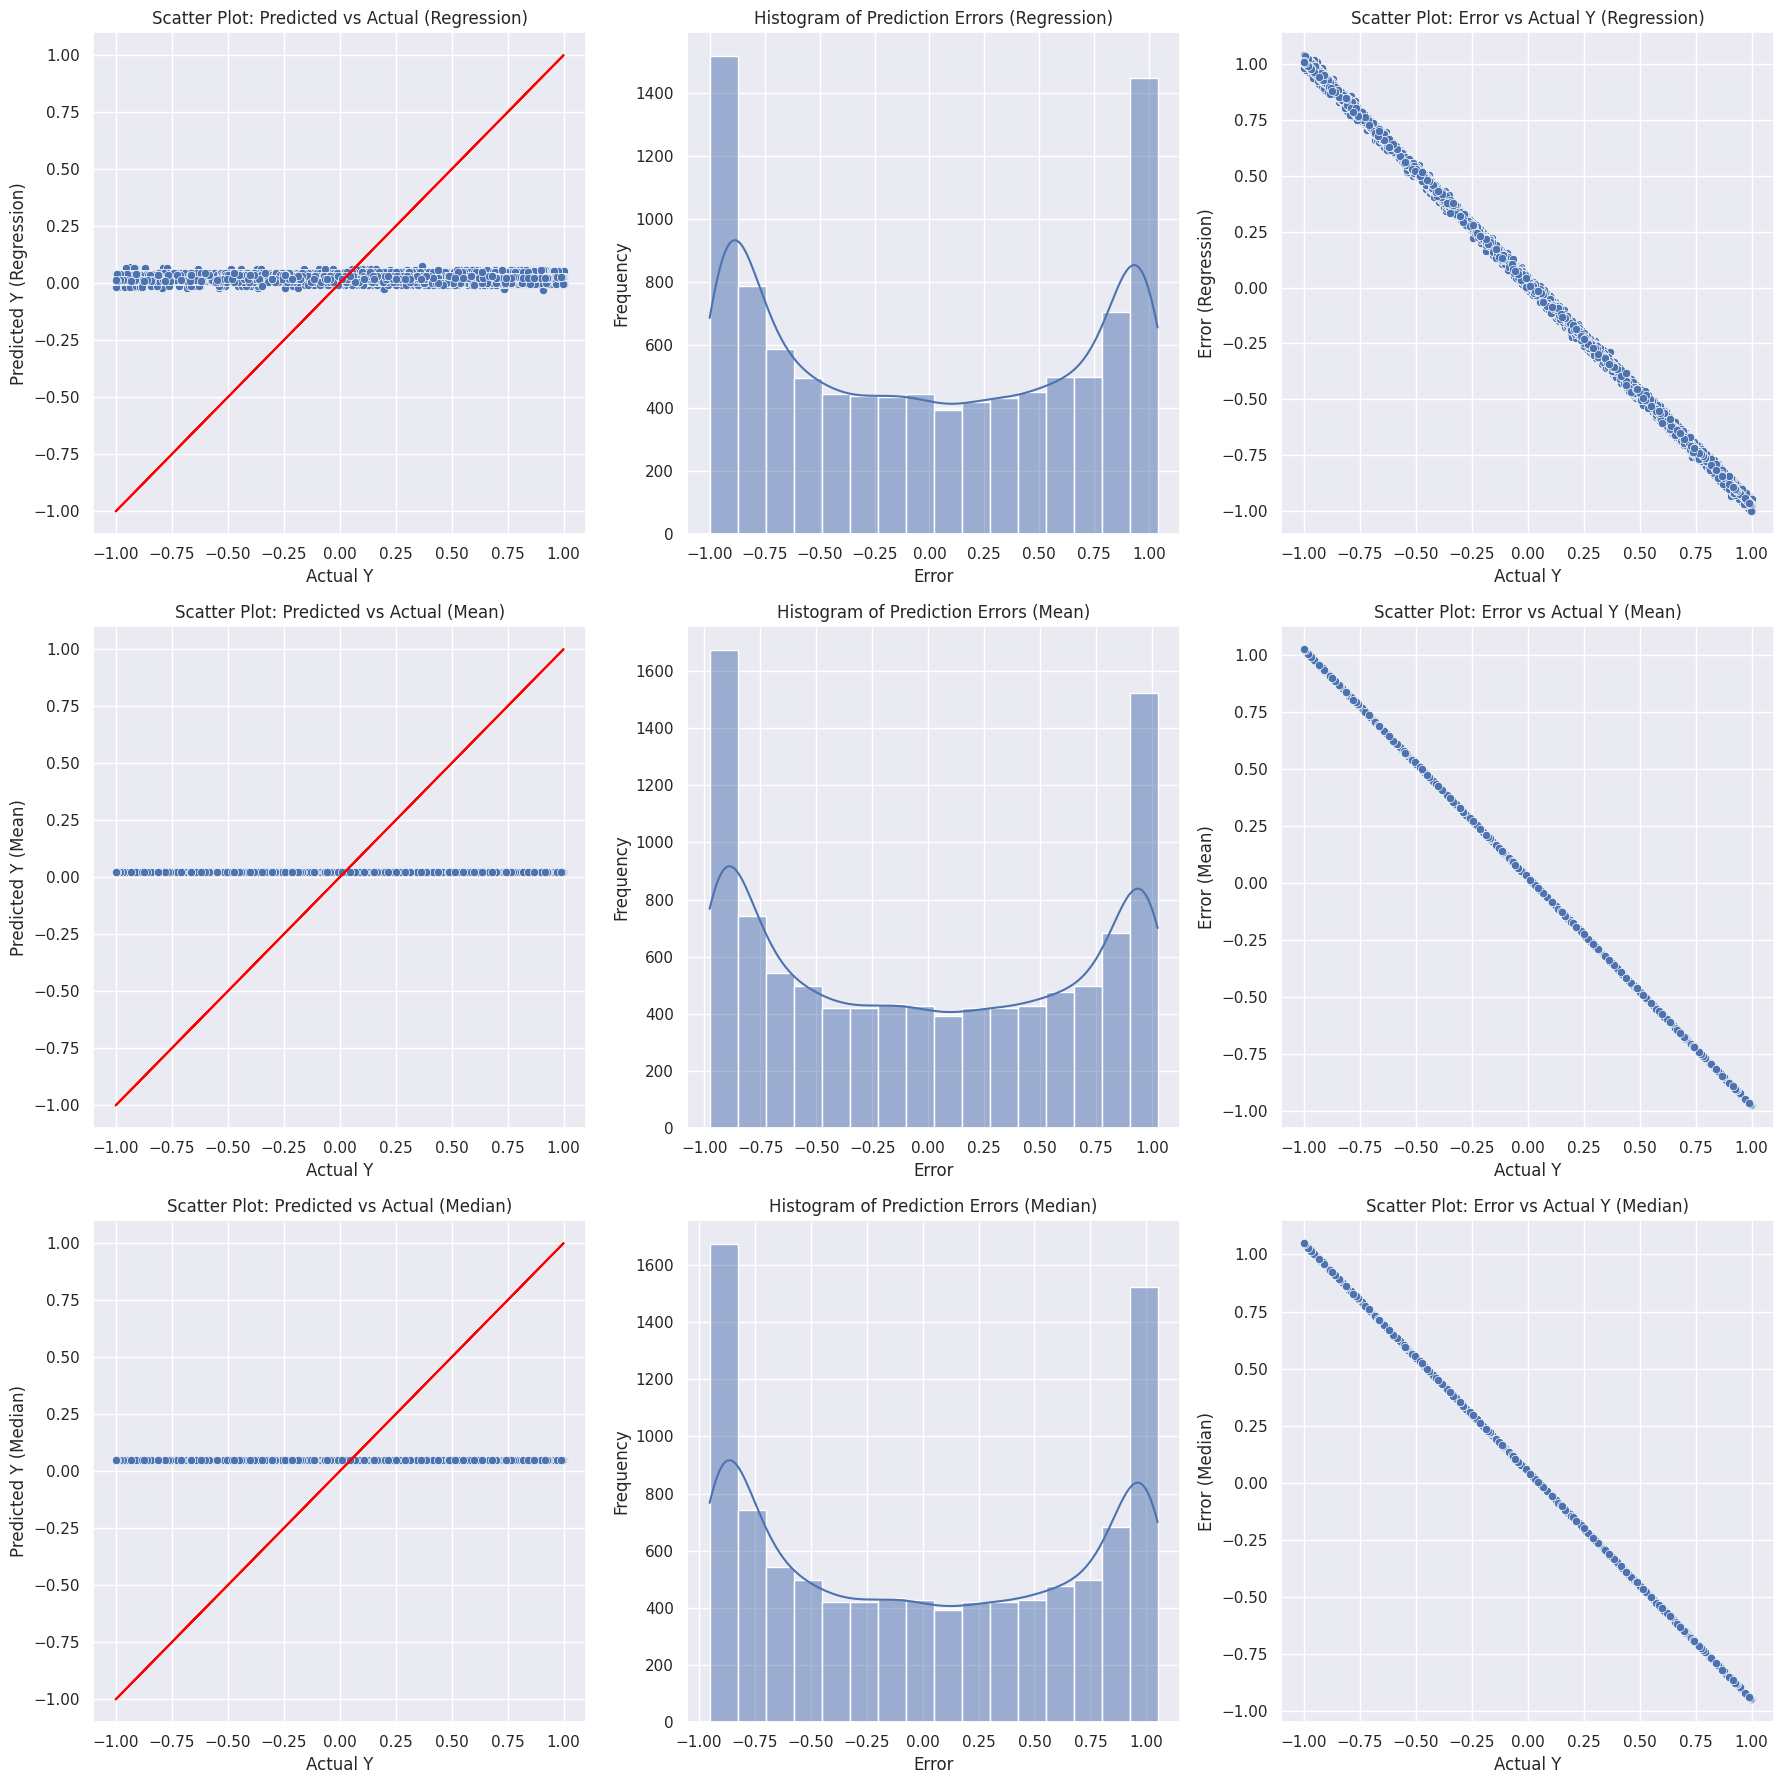

RMSE of prediction (Regression): 0.6331487868228455
RMSE of prediction (Mean): 0.6333126864828453
RMSE of prediction (Median): 0.6331005244765446
Regression coefficients: [-0.00446456]
Intercept: 0.11735141468176233


In [29]:
foo_regresion(X,Y,True)

La prediccion es bastante mala, creemos un polinomio para mejorarla.

Creando X^[2, 3, 4, 5, 6]


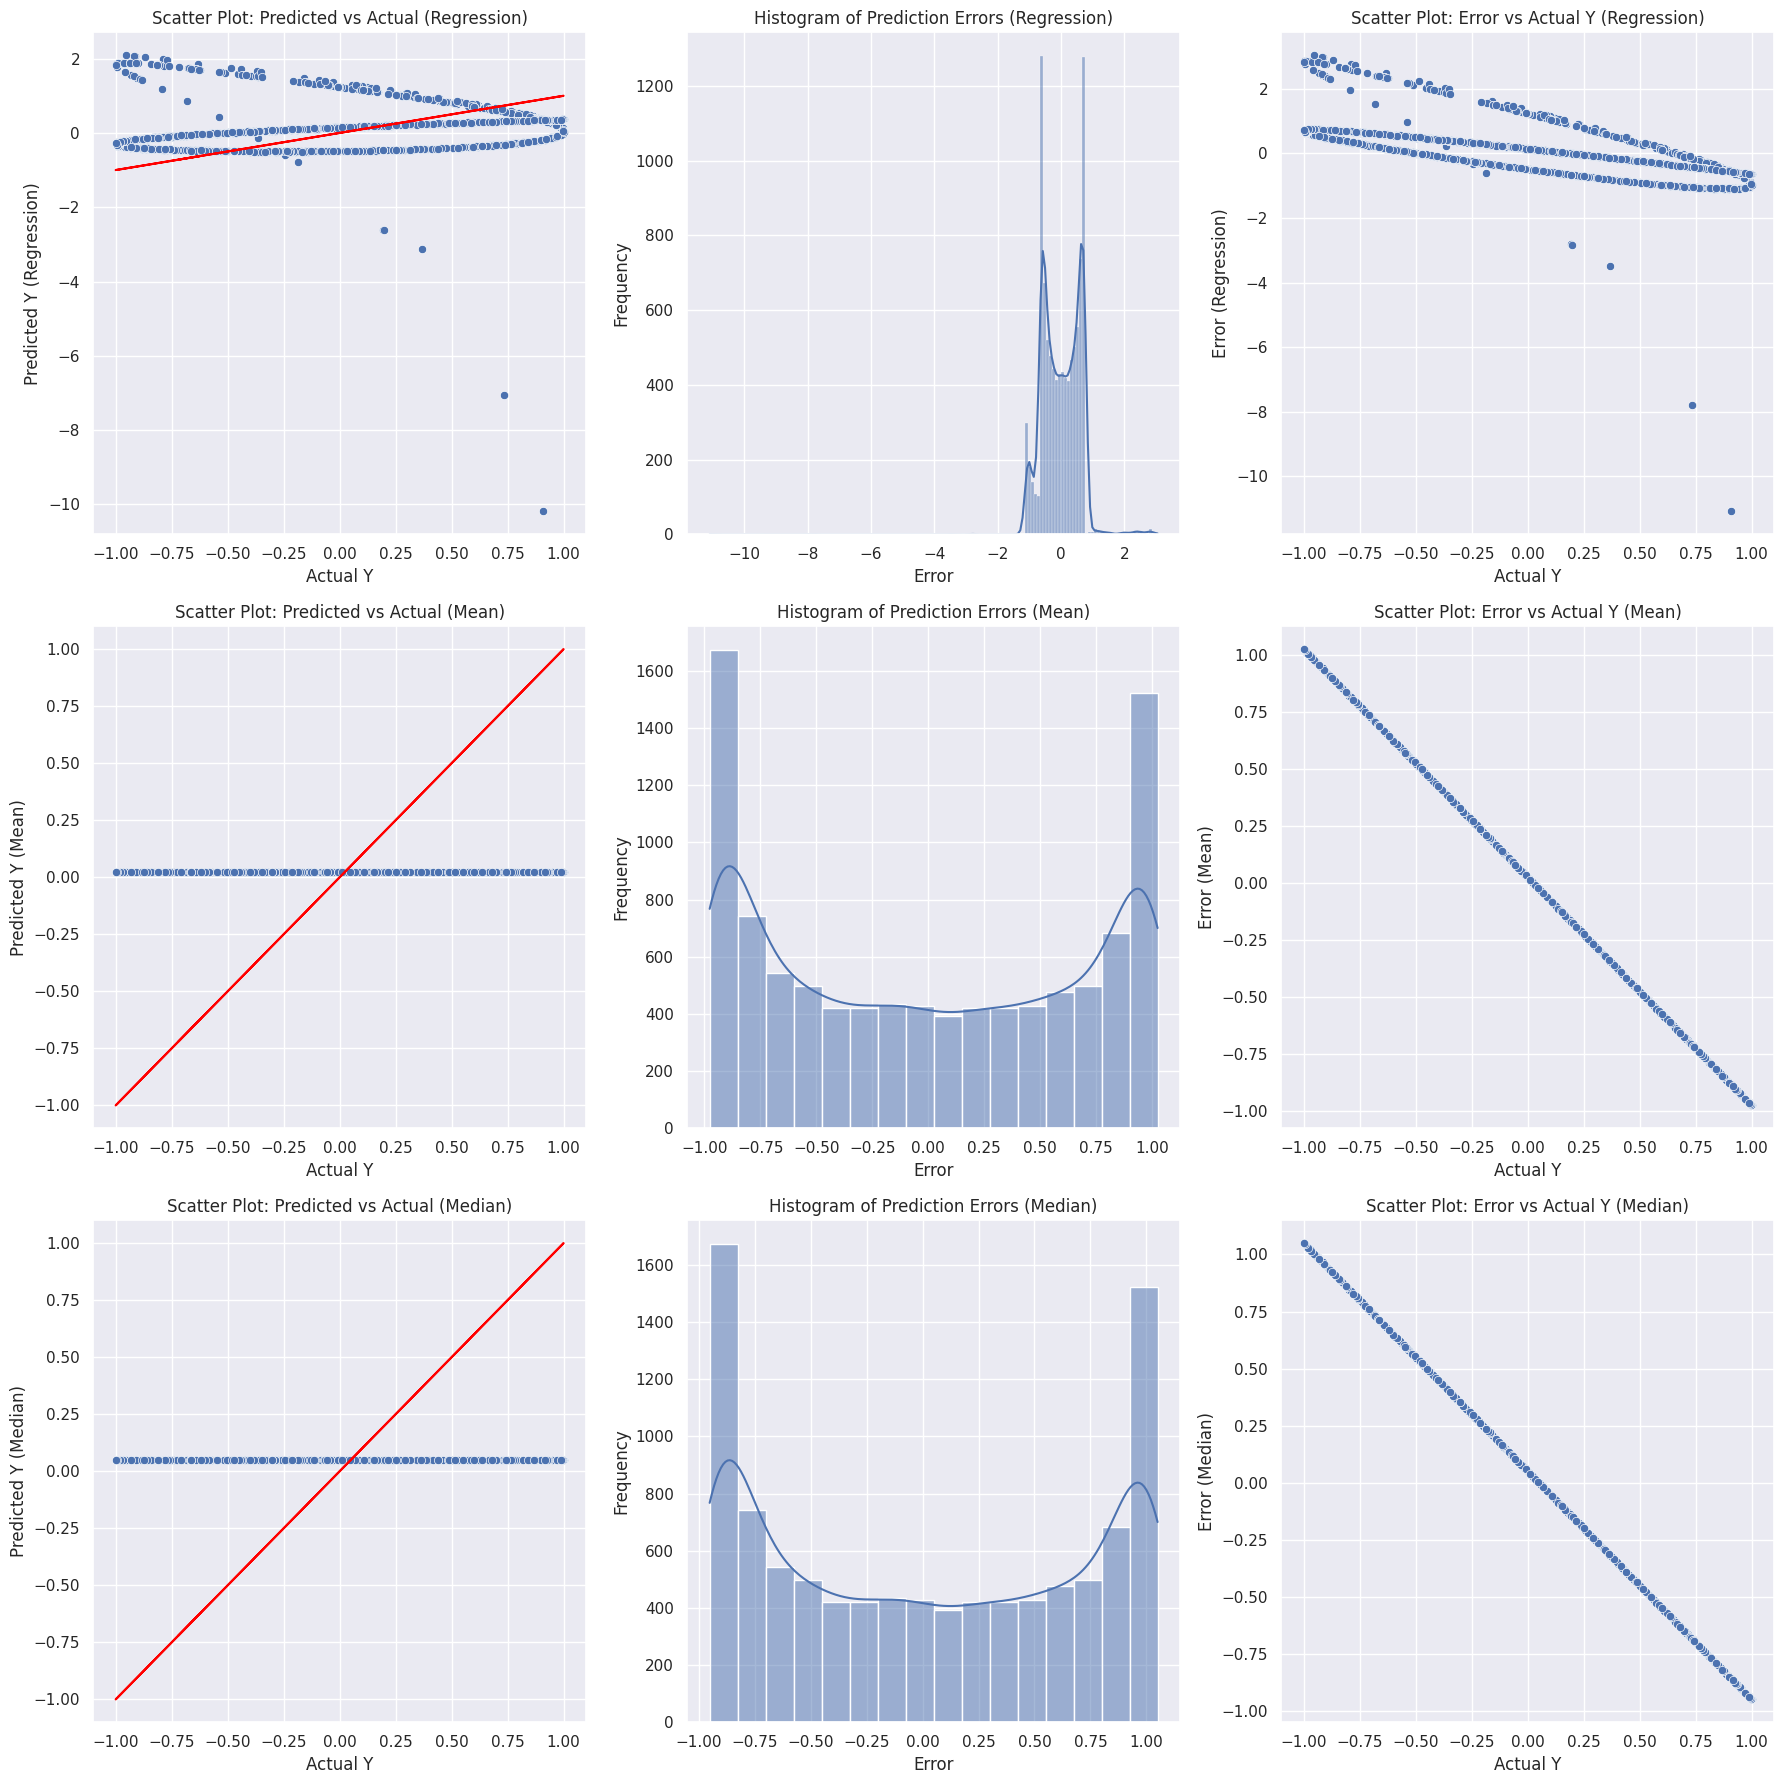

RMSE of prediction (Regression): 0.49681082293784556
RMSE of prediction (Mean): 0.6333126864828453
RMSE of prediction (Median): 0.6331005244765446


In [31]:
X2 = X.copy()
#power = [1 + 1/n for n in range(1,3000)]
power = [1 + n for n in range(1,6)]

for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
print(f"Creando X^{power}")
foo_regresion(X2,Y)

Parece que el error mejoro un poco, pero sigue siendo muy alto apesar de tener muchas nuevas variables polinomiales. Trata de explorar si puedes mejorar el error utilizando solo transformaciones polinomiales. No es la peor prediccion, pero no es muy buena.

# Limites de Modelaje

## Extrapolacion o "Fat-Tails"

Ahora veamos que pasa cuando nuestros datos son muy dispersos. La idea es que veamos como se comporta el modelo con extrapolacion.

$ y = sin(x) $

Pero esta vez, $X$ tomara valores muy dispersos, osea tendra mucha varianza!

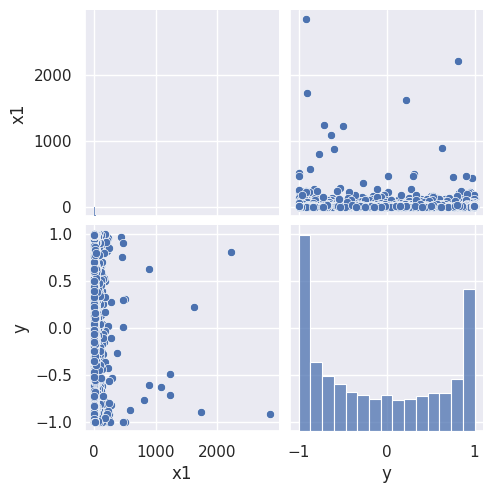

In [32]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))

# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

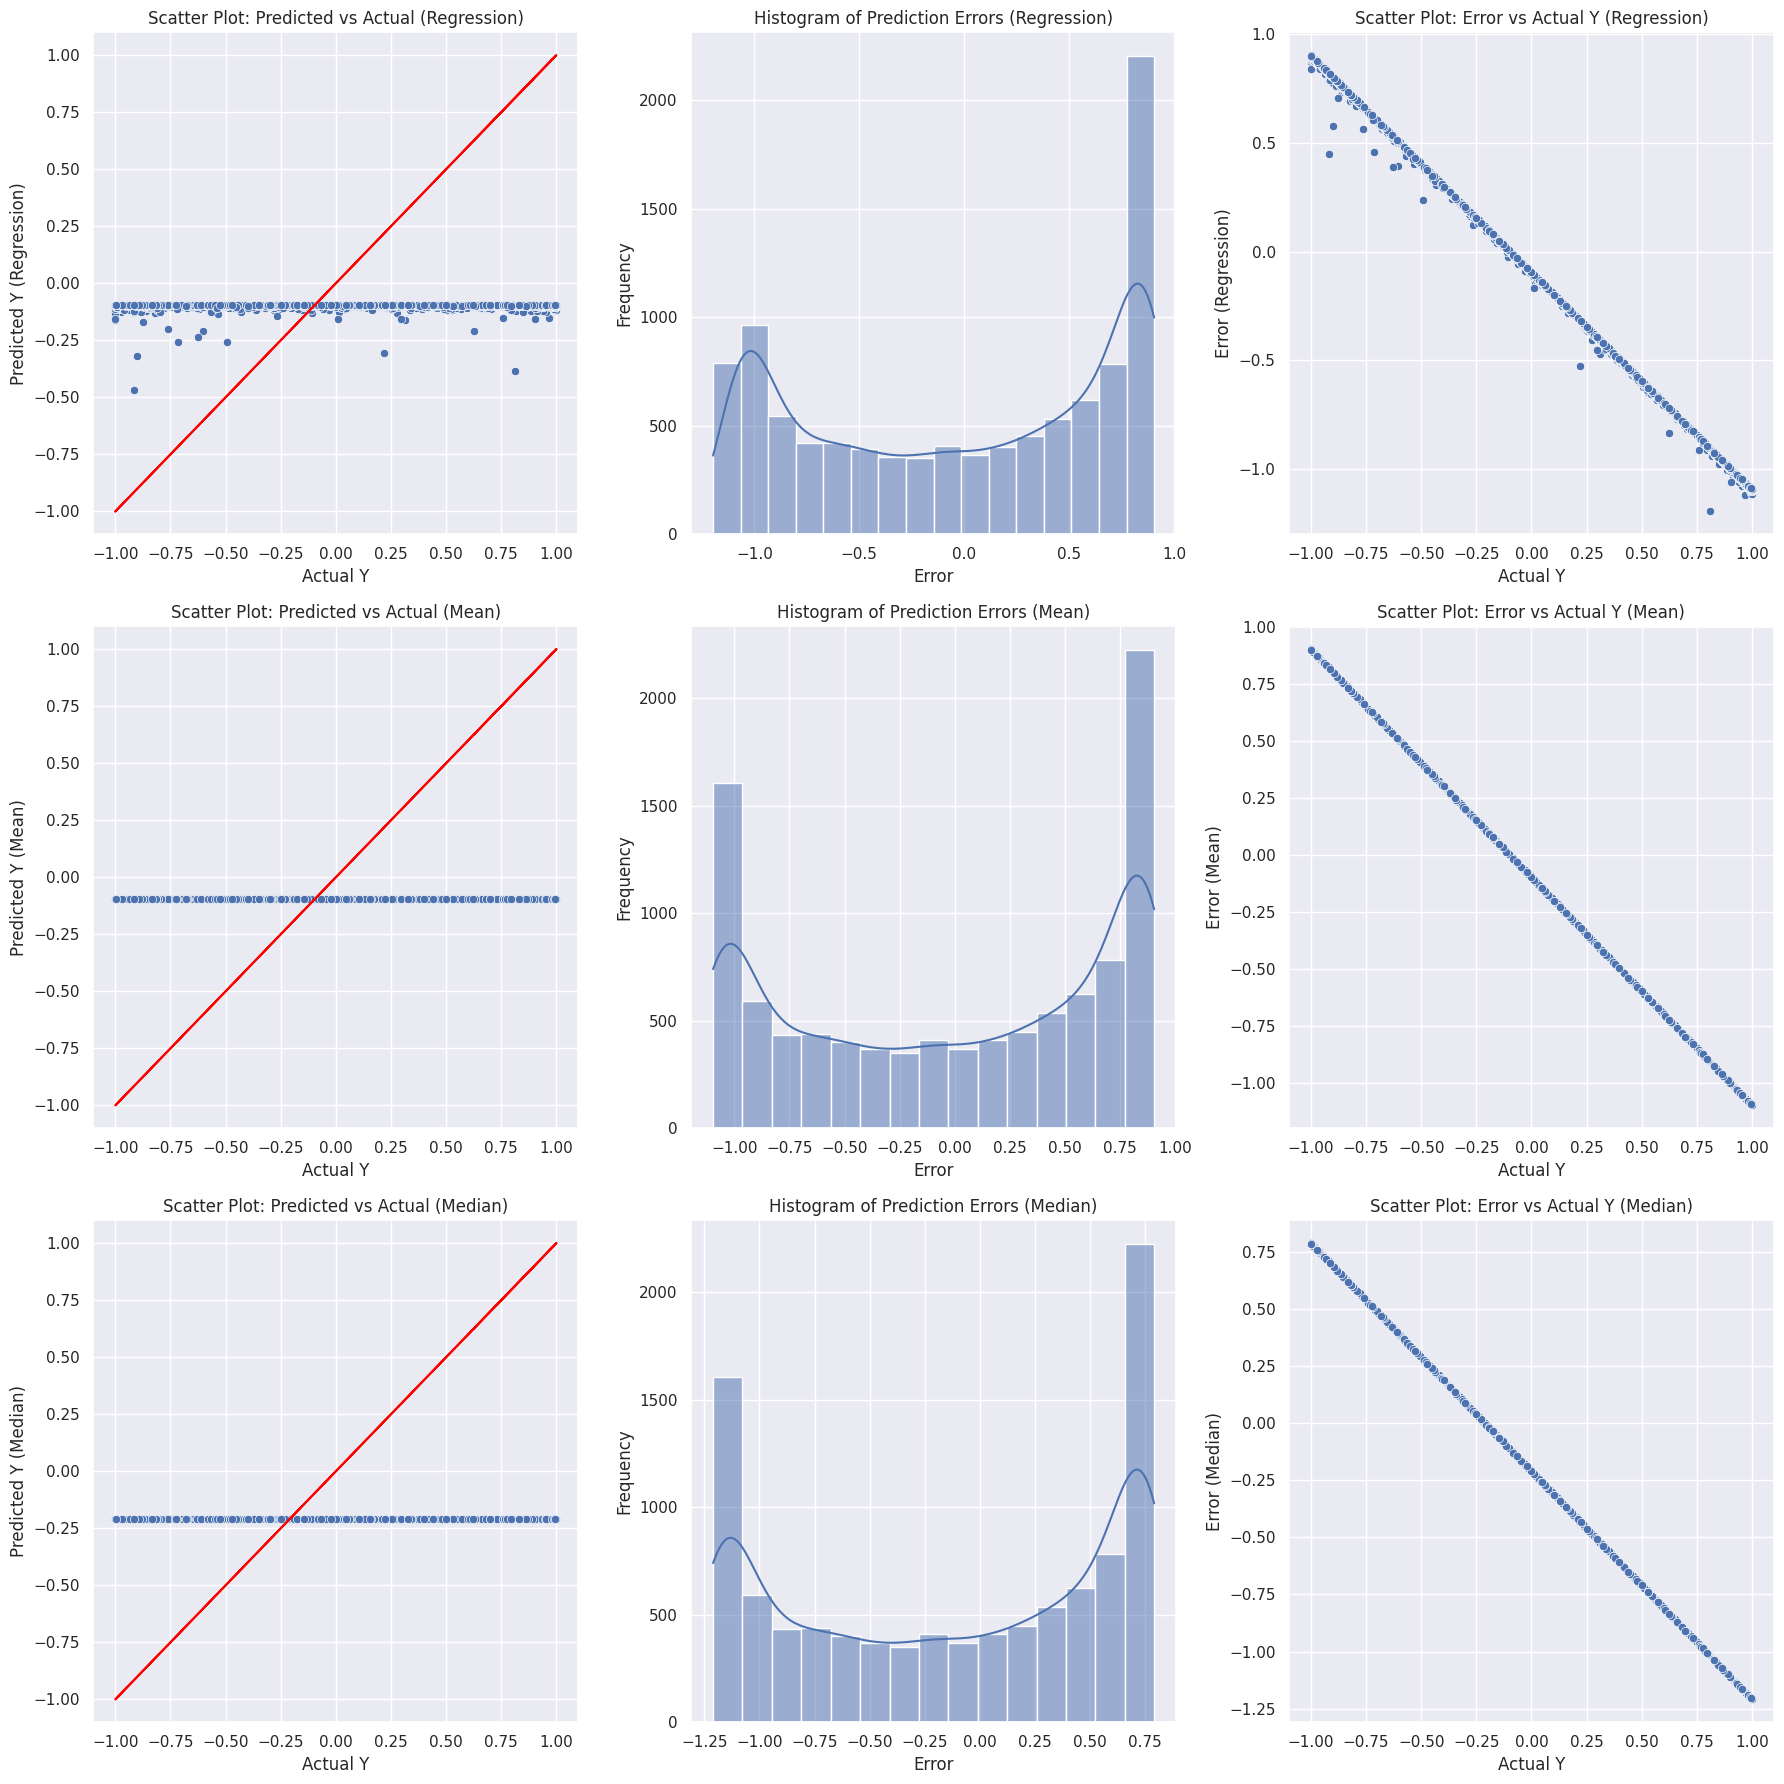

RMSE of prediction (Regression): 0.6572884811970667
RMSE of prediction (Mean): 0.657335393371205
RMSE of prediction (Median): 0.6535627895548282
Regression coefficients: [-0.00013088]
Intercept: -0.09482068551260658


In [33]:
foo_regresion(X,Y,True)

[2, 3, 4, 5, 6]


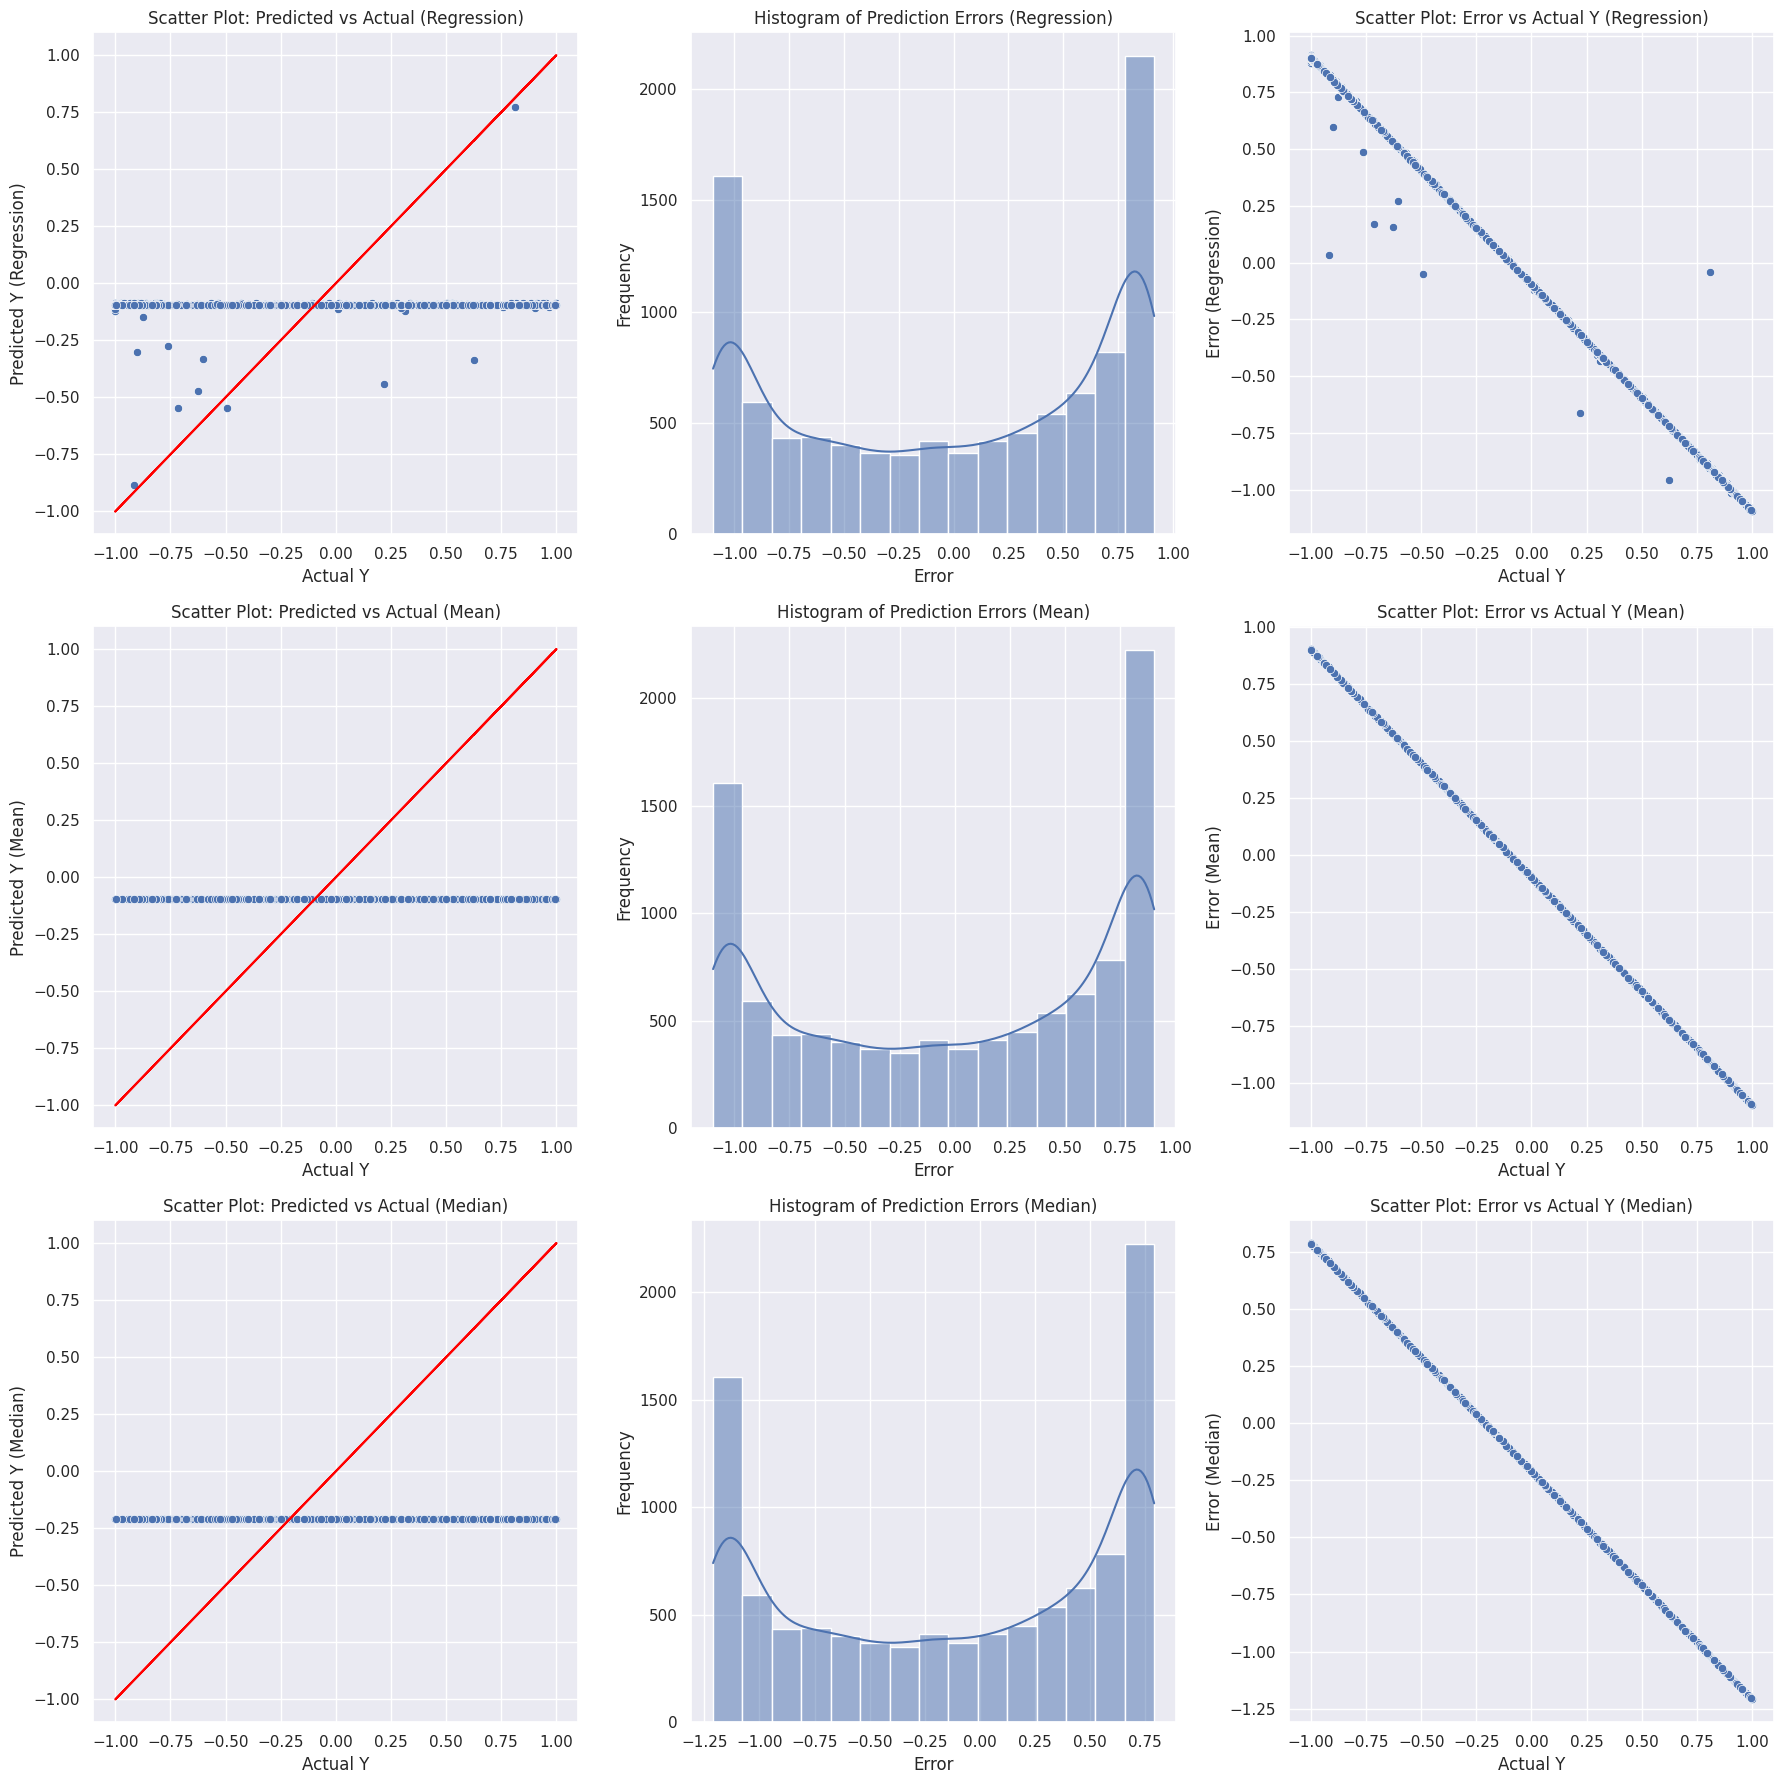

RMSE of prediction (Regression): 0.6570647891918172
RMSE of prediction (Mean): 0.657335393371205
RMSE of prediction (Median): 0.6535627895548282


In [35]:
X2 = X.copy()
# Exponentes polinomiales
#power = [1 + n/10 for n in range(1,500)]
power = [1 + n for n in range(1,6)]
print(power)
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

+ Que notas sobre los errores con respecto a las predicciones anteriores del $sin(x)$?
+ En donde aparecen los errores mas altos? Notas algun patron en particular?
+ Utilizando solo transformaciones polinomicas y la regresion lineal que podrias hacer para mejorar el modelo?

## Incertidumbre no observada

Ahora utilicemos una de nuestras funciones anteriores pero agreguemos incertidumbre. Esta incertidumbre podria representar variables omitidas, ruido en la muestra, incertidumbre inherente al modelo, errores de captura, etc..

Simulemos heterocedasticidad, rompiendo el supuesto donde $E[\epsilon | x] != 0$

$y = x_1 + \epsilon_1*\epsilon_2$

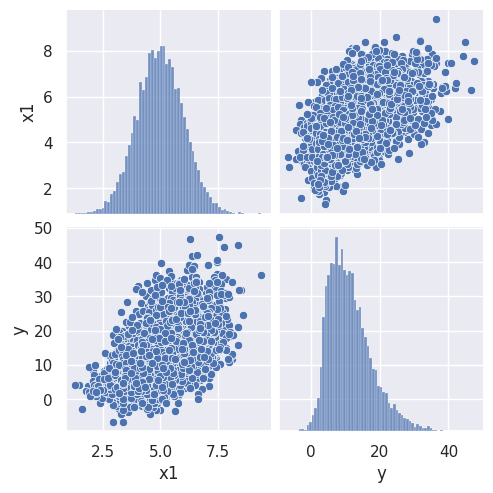

In [36]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
mean = [5,2,3]
cov = [[1,.5,.5],[.5,2,.5],[.5,.5,2]]
X = np.random.multivariate_normal(mean, cov, N)


# Simulacion de Y
Y = X[:,0] + X[:,1]*X[:,2]
Y = Y.reshape(-1)
X = X[:,0]
X = X.reshape((N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

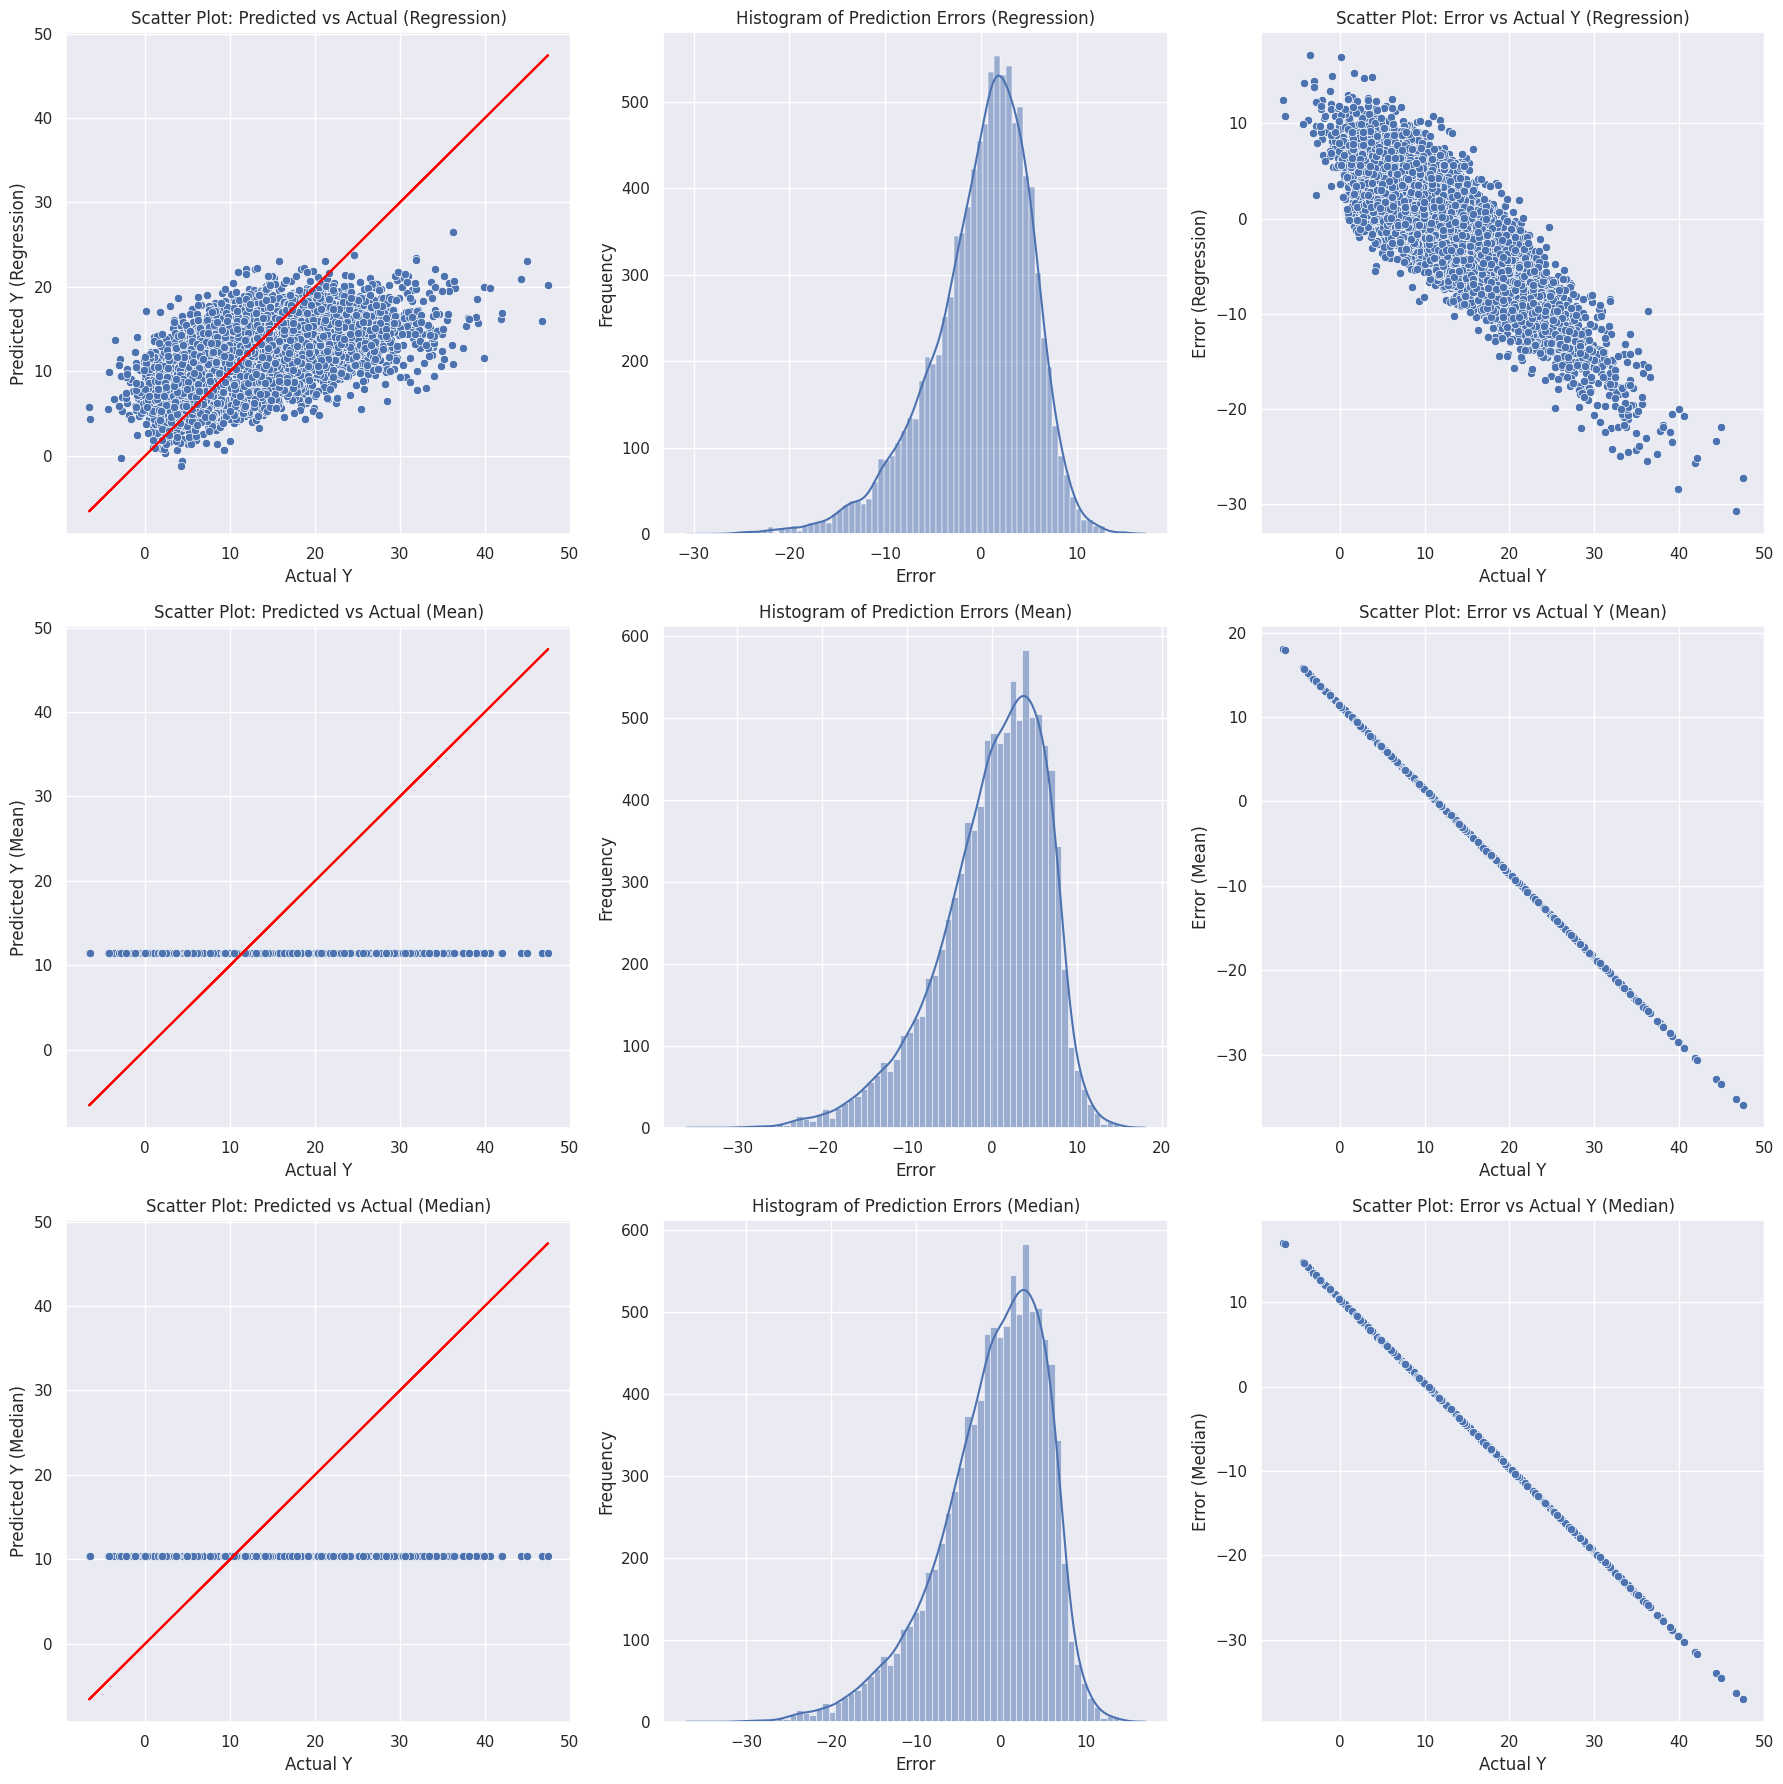

RMSE of prediction (Regression): 4.169746507744684
RMSE of prediction (Mean): 5.018285735508248
RMSE of prediction (Median): 4.949231220993754
Regression coefficients: [3.43781377]
Intercept: -5.730691914942133


In [37]:
foo_regresion(X,Y,True)

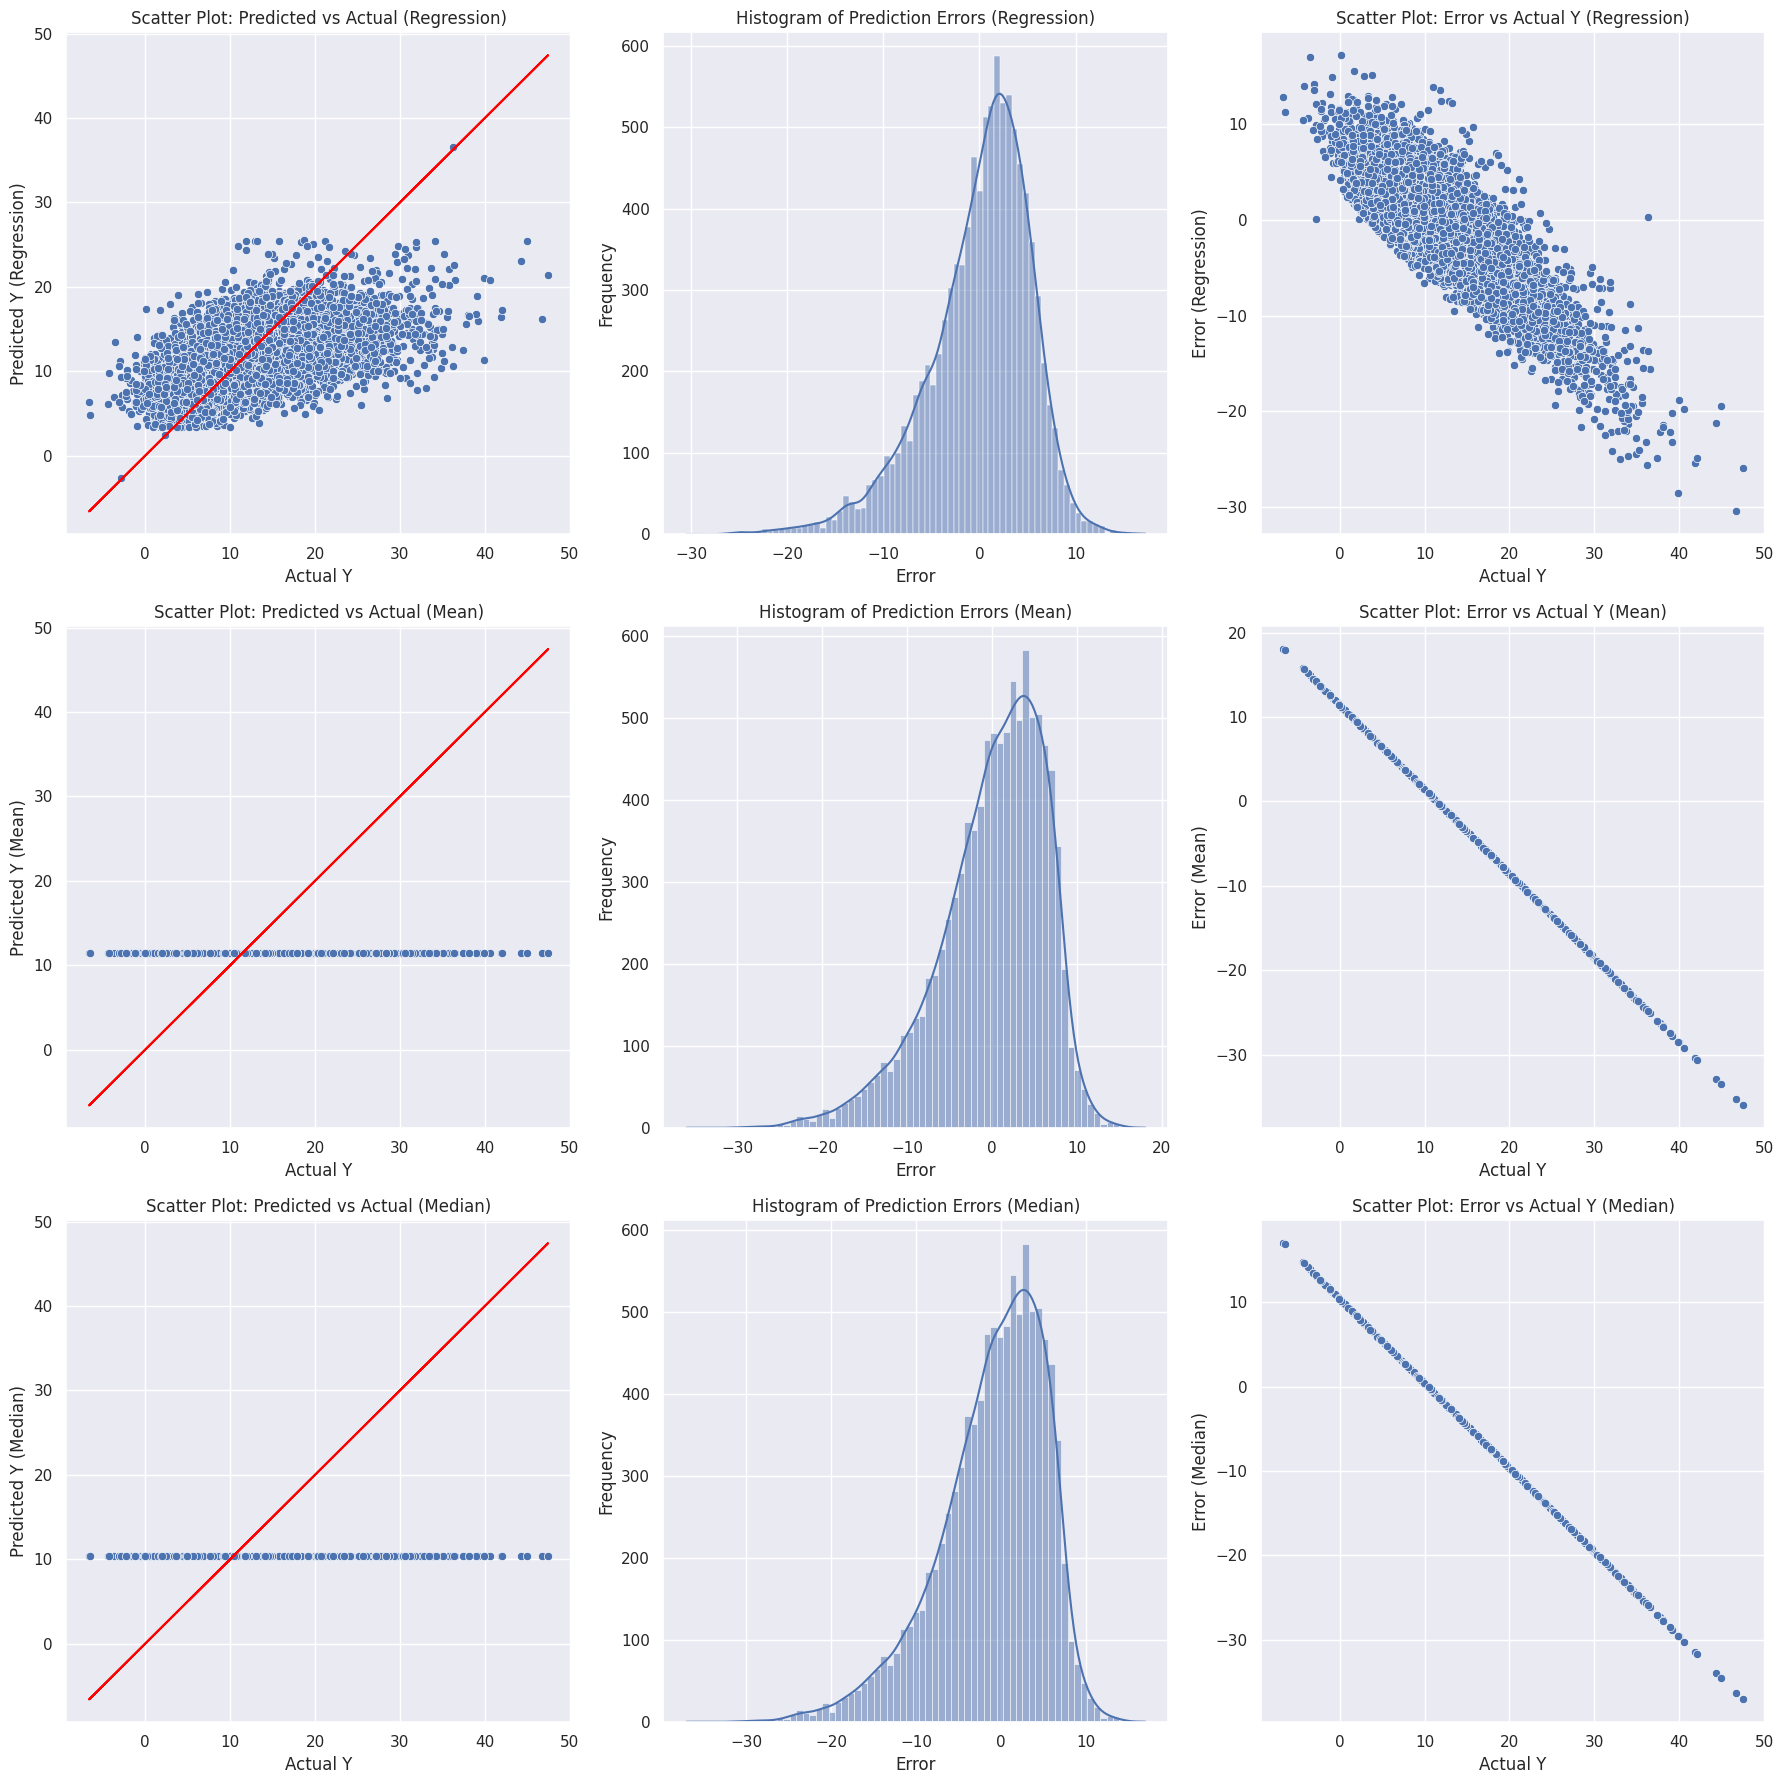

RMSE of prediction (Regression): 4.161235999647549
RMSE of prediction (Mean): 5.018285735508248
RMSE of prediction (Median): 4.949231220993754


In [38]:
X2 = X.copy()

#Ingenieria de Variables
power = [1 + n/2 for n in range(1,10)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

+ Que esta pasando con nuestro modelo a pesar de que estamos agregando nuevas variables?

Ahora usemos un modelo aun mas complejo y regresemos al supuesto $E[\epsilon | x] = 0$

$y =  x + ln(x) + xln(x) + 1/x + x^{1.3} + \epsilon_1*\epsilon_2$

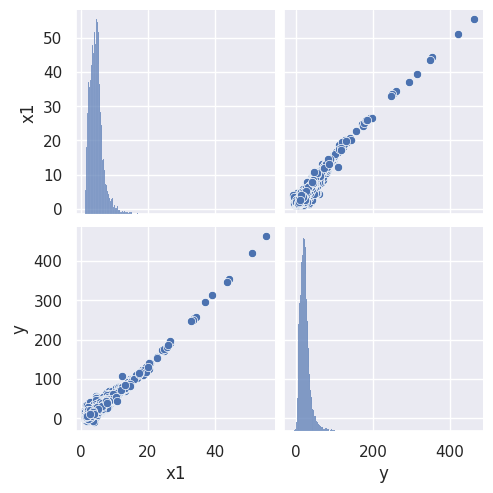

In [39]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,1,size=(N,1))
mean = [1,1]
cov = [[2,.3],[.3,5]]
E = np.random.multivariate_normal(mean, cov, N)
# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3) + (E[:,0]*E[:,1]).reshape((N,1))
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

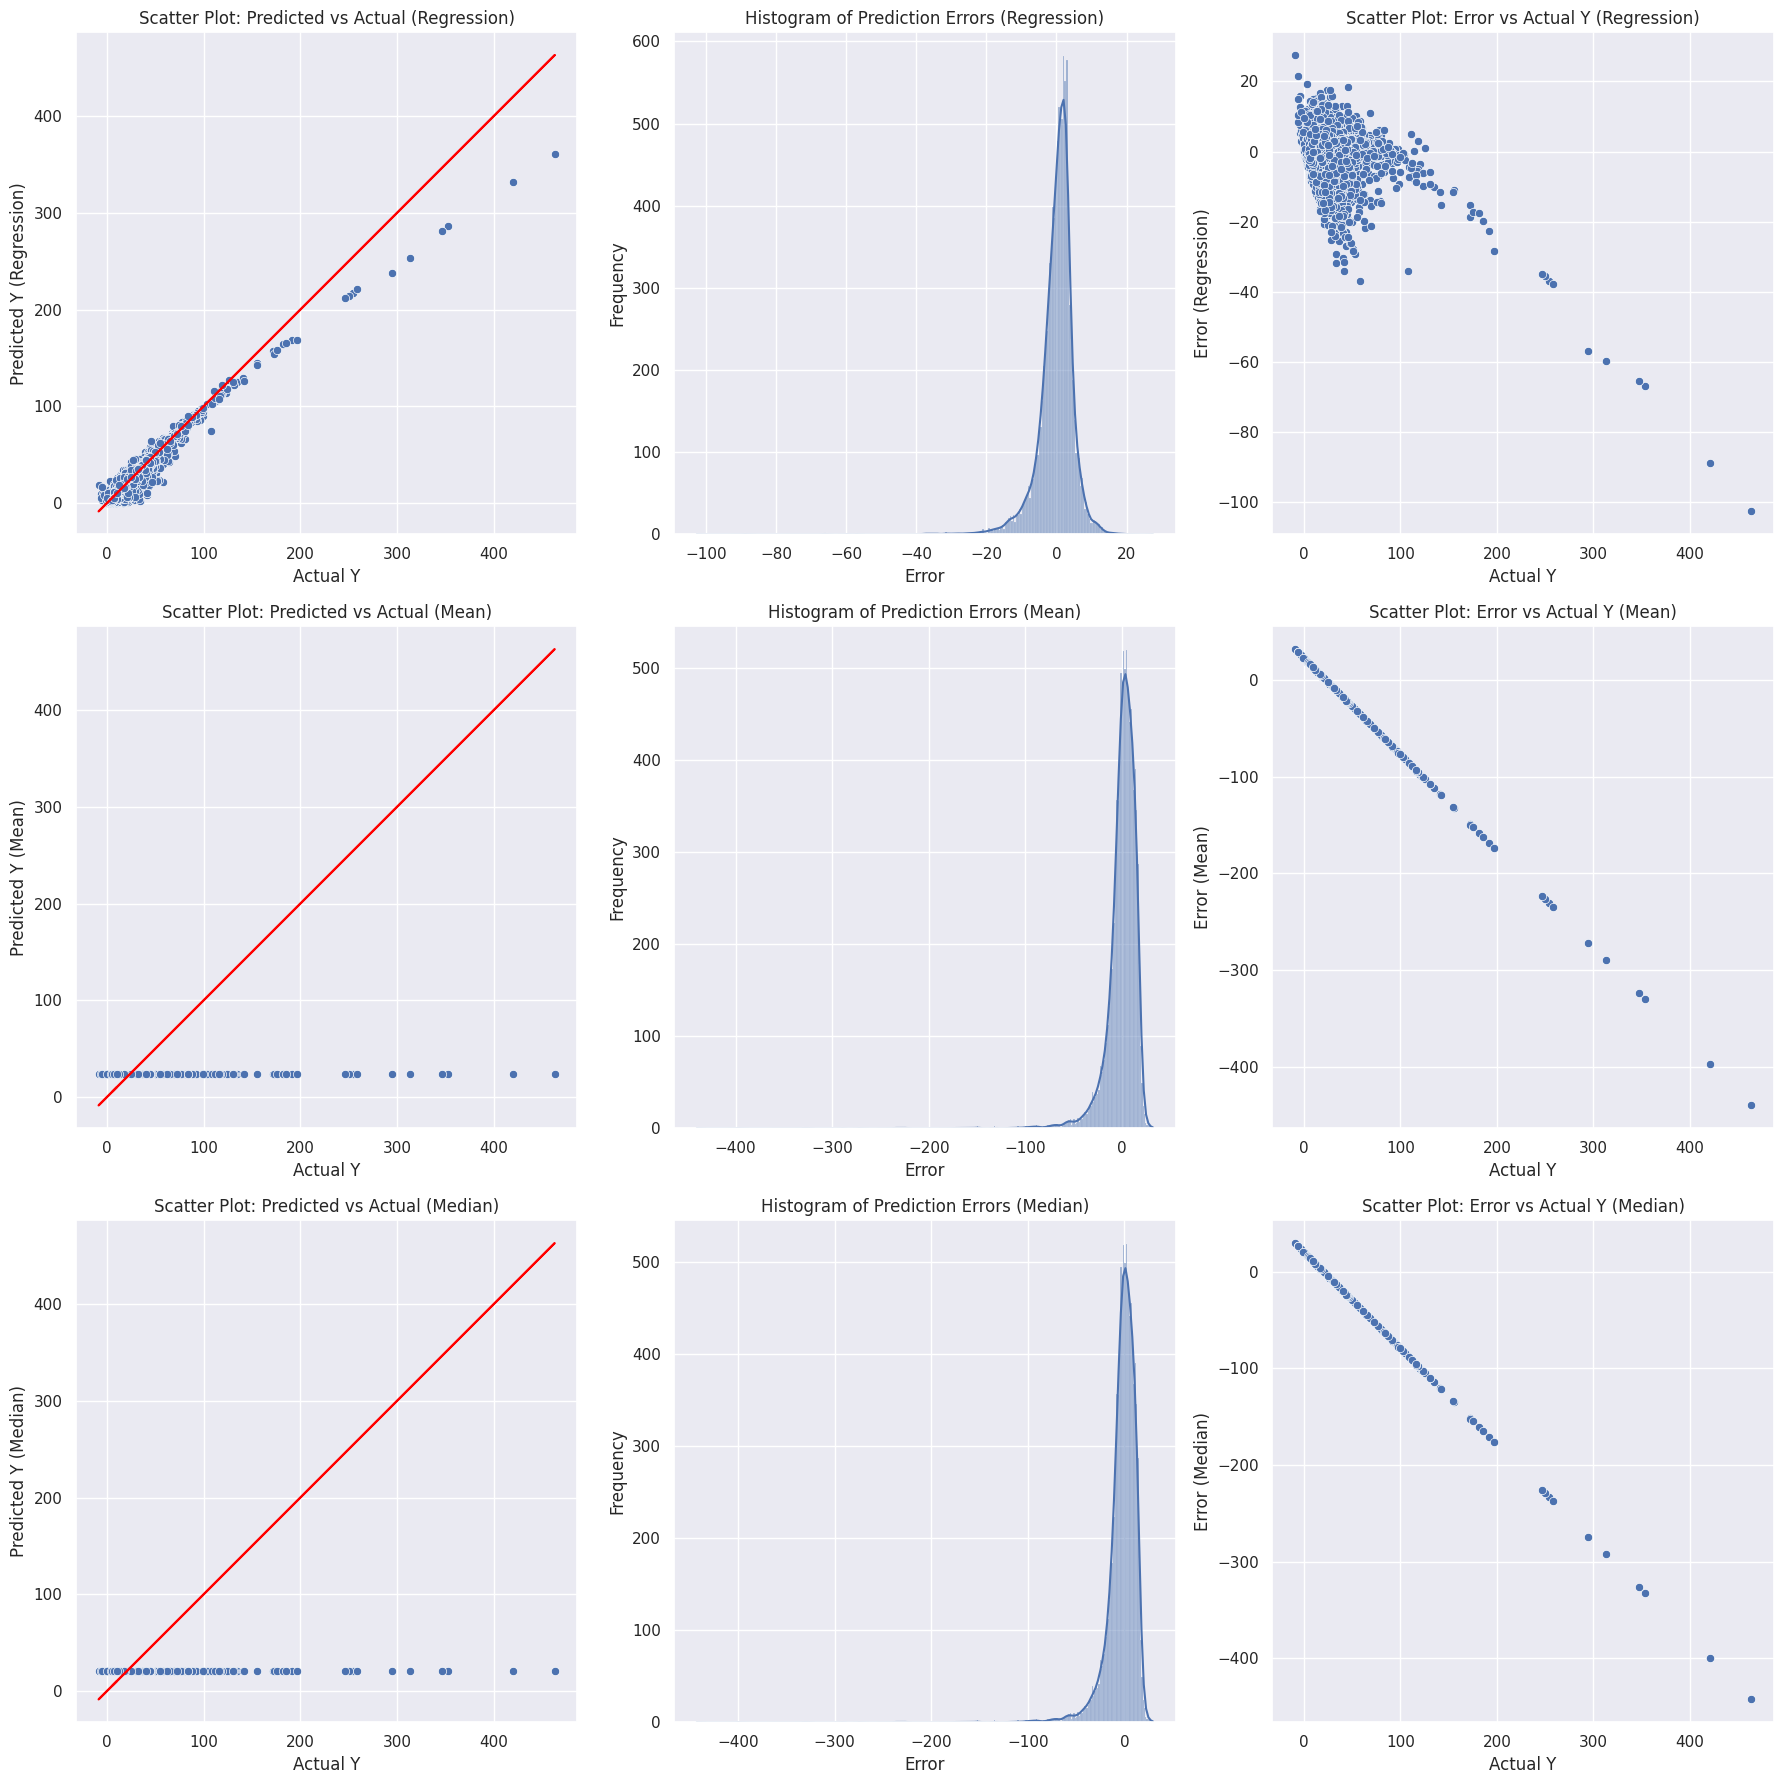

RMSE of prediction (Regression): 3.363706684030585
RMSE of prediction (Mean): 10.296723923113115
RMSE of prediction (Median): 10.040990964371417
Regression coefficients: [6.64933945]
Intercept: -7.921469214482215


In [40]:
foo_regresion(X,Y,True)

Utilicemos un polinomio muy grande para tratar de mejorar el modelo

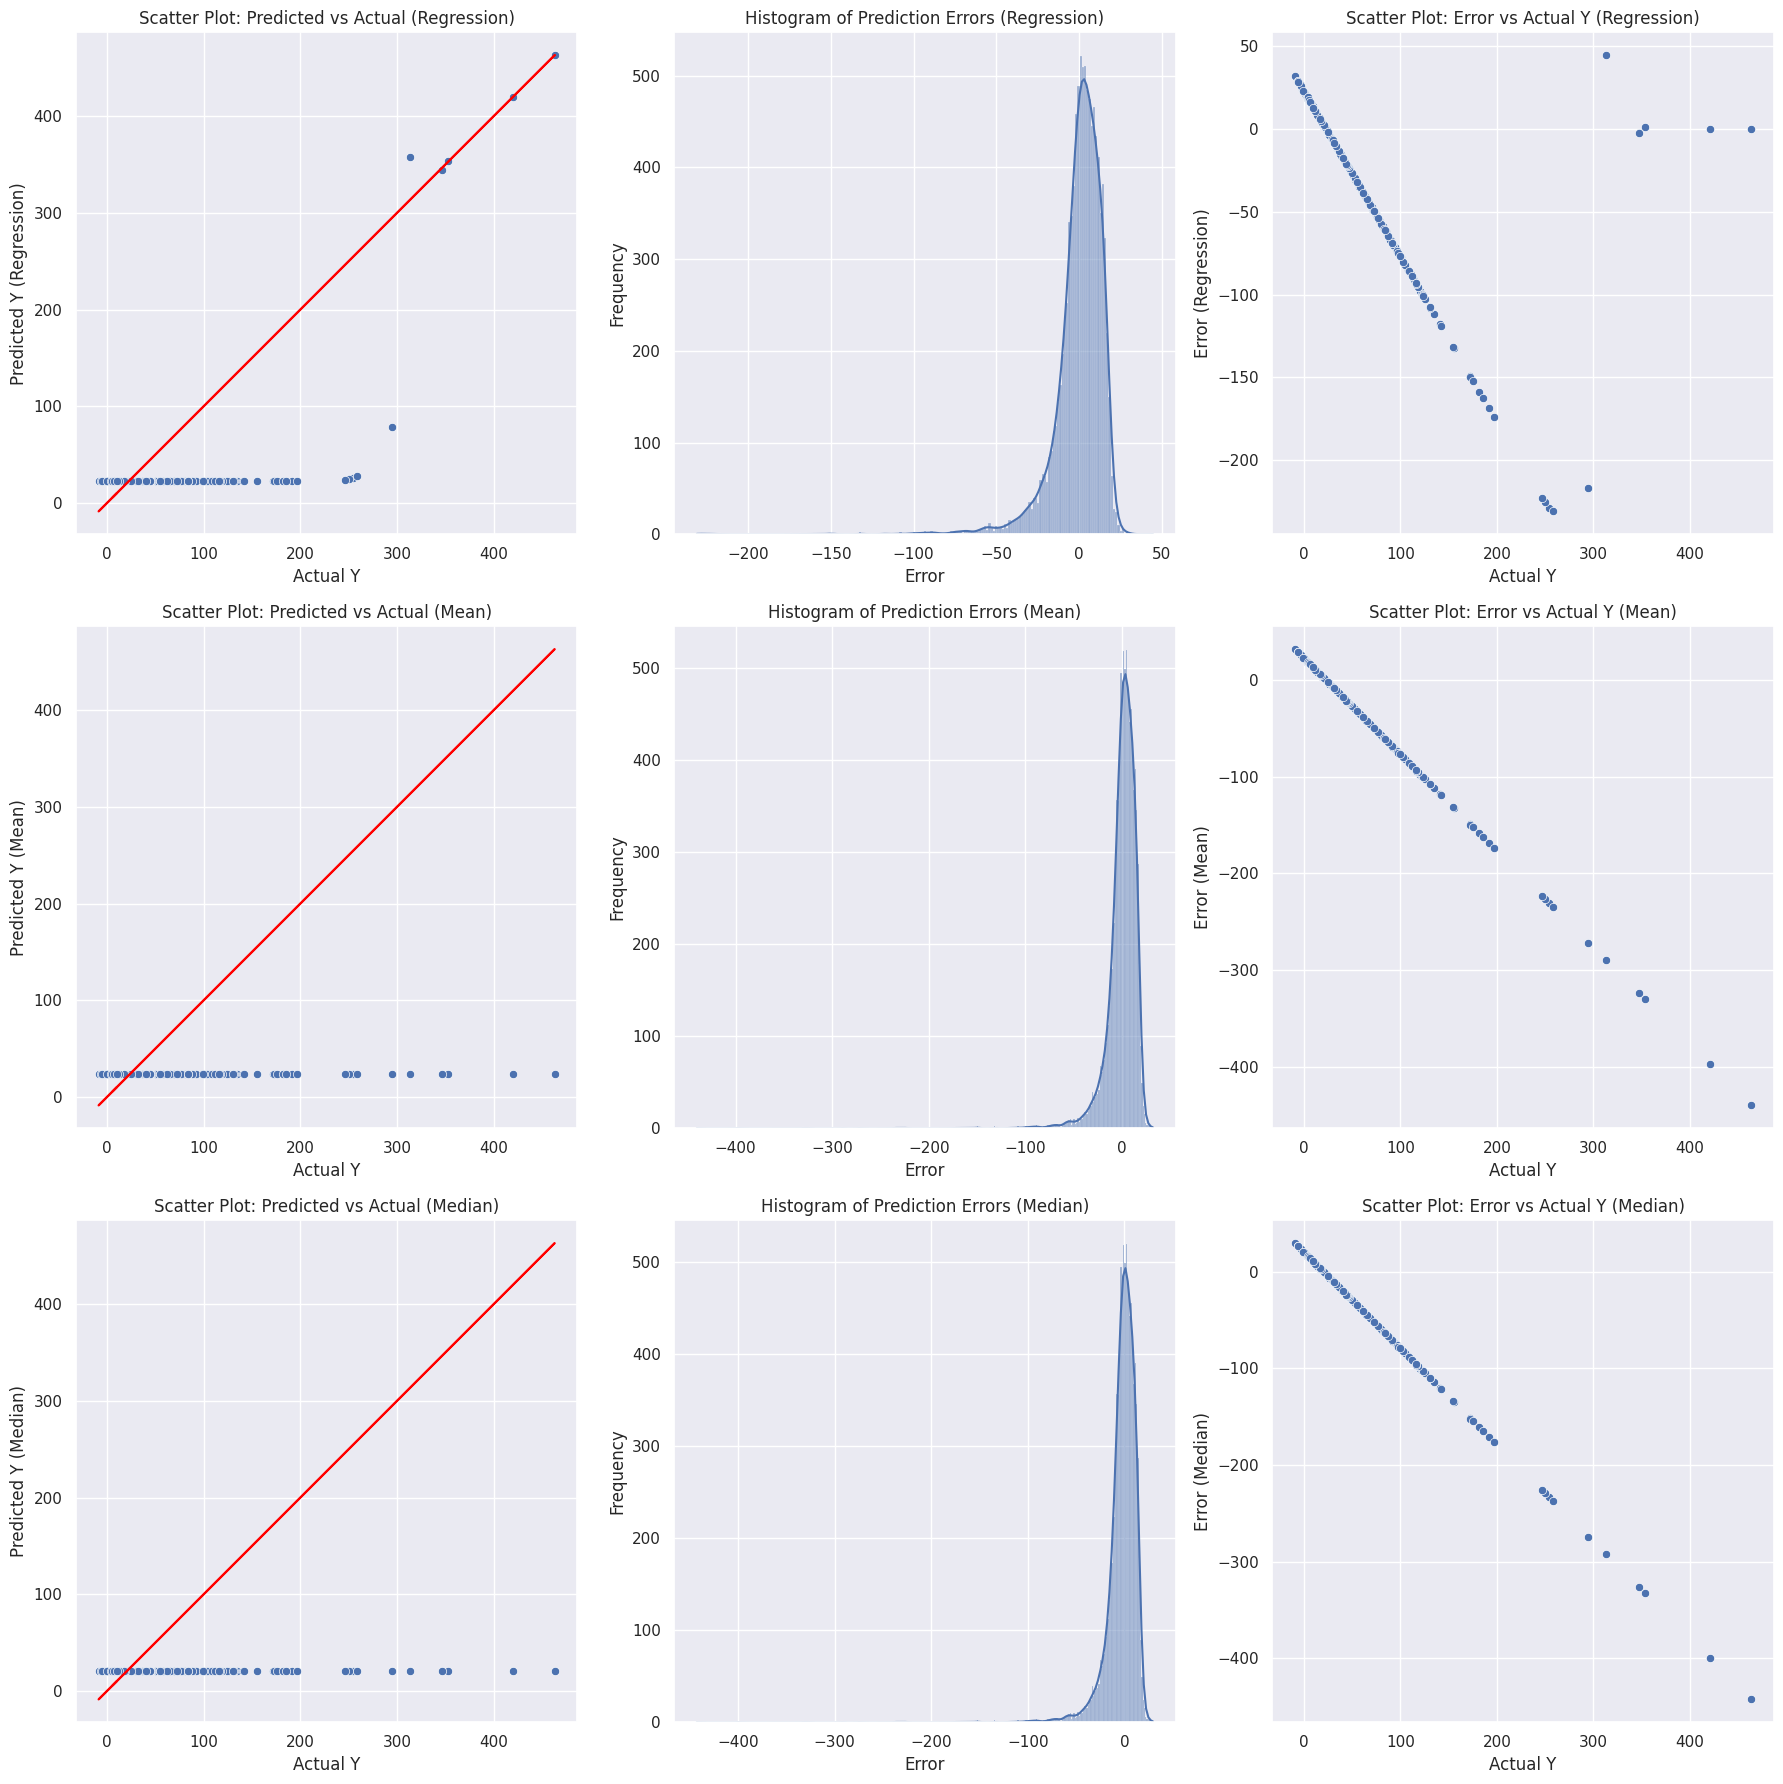

RMSE of prediction (Regression): 10.080950870968328
RMSE of prediction (Mean): 10.296723923113115
RMSE of prediction (Median): 10.040990964371417


In [41]:
X2 = X.copy()

#Ingenieria de Variables
X2 = np.reshape(X2, (N,1))
power = [1 + n/2 for n in range(1,100)]
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

+ Que paso con el nuestro errror respecto a lo anterior?
+ Como es posible que ocurra esto cuando tenemos mas varaibles, no deberia de mejorar la prediccion?

## Comportamiento mas complejo

Creemos funciones con comportamiento mas complejo, en este caso utilicemos recursividad (podria representar series de tiempo)

$y_t =  .8*y_{t-1} + x + ln(x) + 1/x + x^{1.3} $

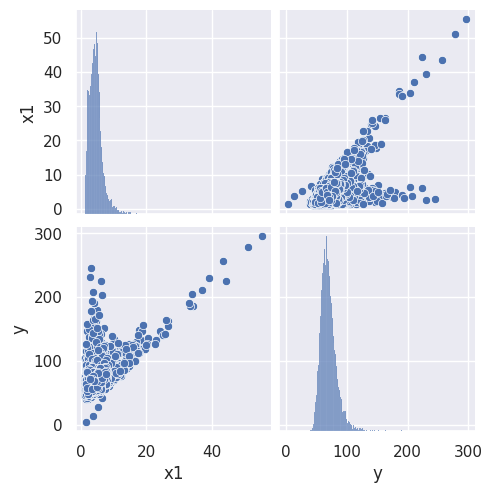

In [42]:
# Seed for reproducibility
np.random.seed(589)

N = 10000

# Generate X
X = np.random.uniform(1, 5, size=(N, 1)) + np.random.lognormal(0, 1, size=(N, 1))

mean = [1, 1]
cov = [[2, .3], [.3, 5]]

# Initialize Y
Y = np.zeros(N)

# Generate Y recursively
for i in range(N):
    if i == 0:
        # Base case for the first value of Y
        Y[i] = X[i] + np.log(X[i]) + 1 / X[i] + np.power(X[i], 1.3)
    else:
        # Recursive relation: Y[i] depends on Y[i-1] and current X[i]
        Y[i] = 0.8 * Y[i - 1] + X[i] + np.log(X[i]) + 1 / X[i] + np.power(X[i], 1.3) 

df = pd.DataFrame(data={'x1': X.flatten(), 'y': Y})
sns.pairplot(df)


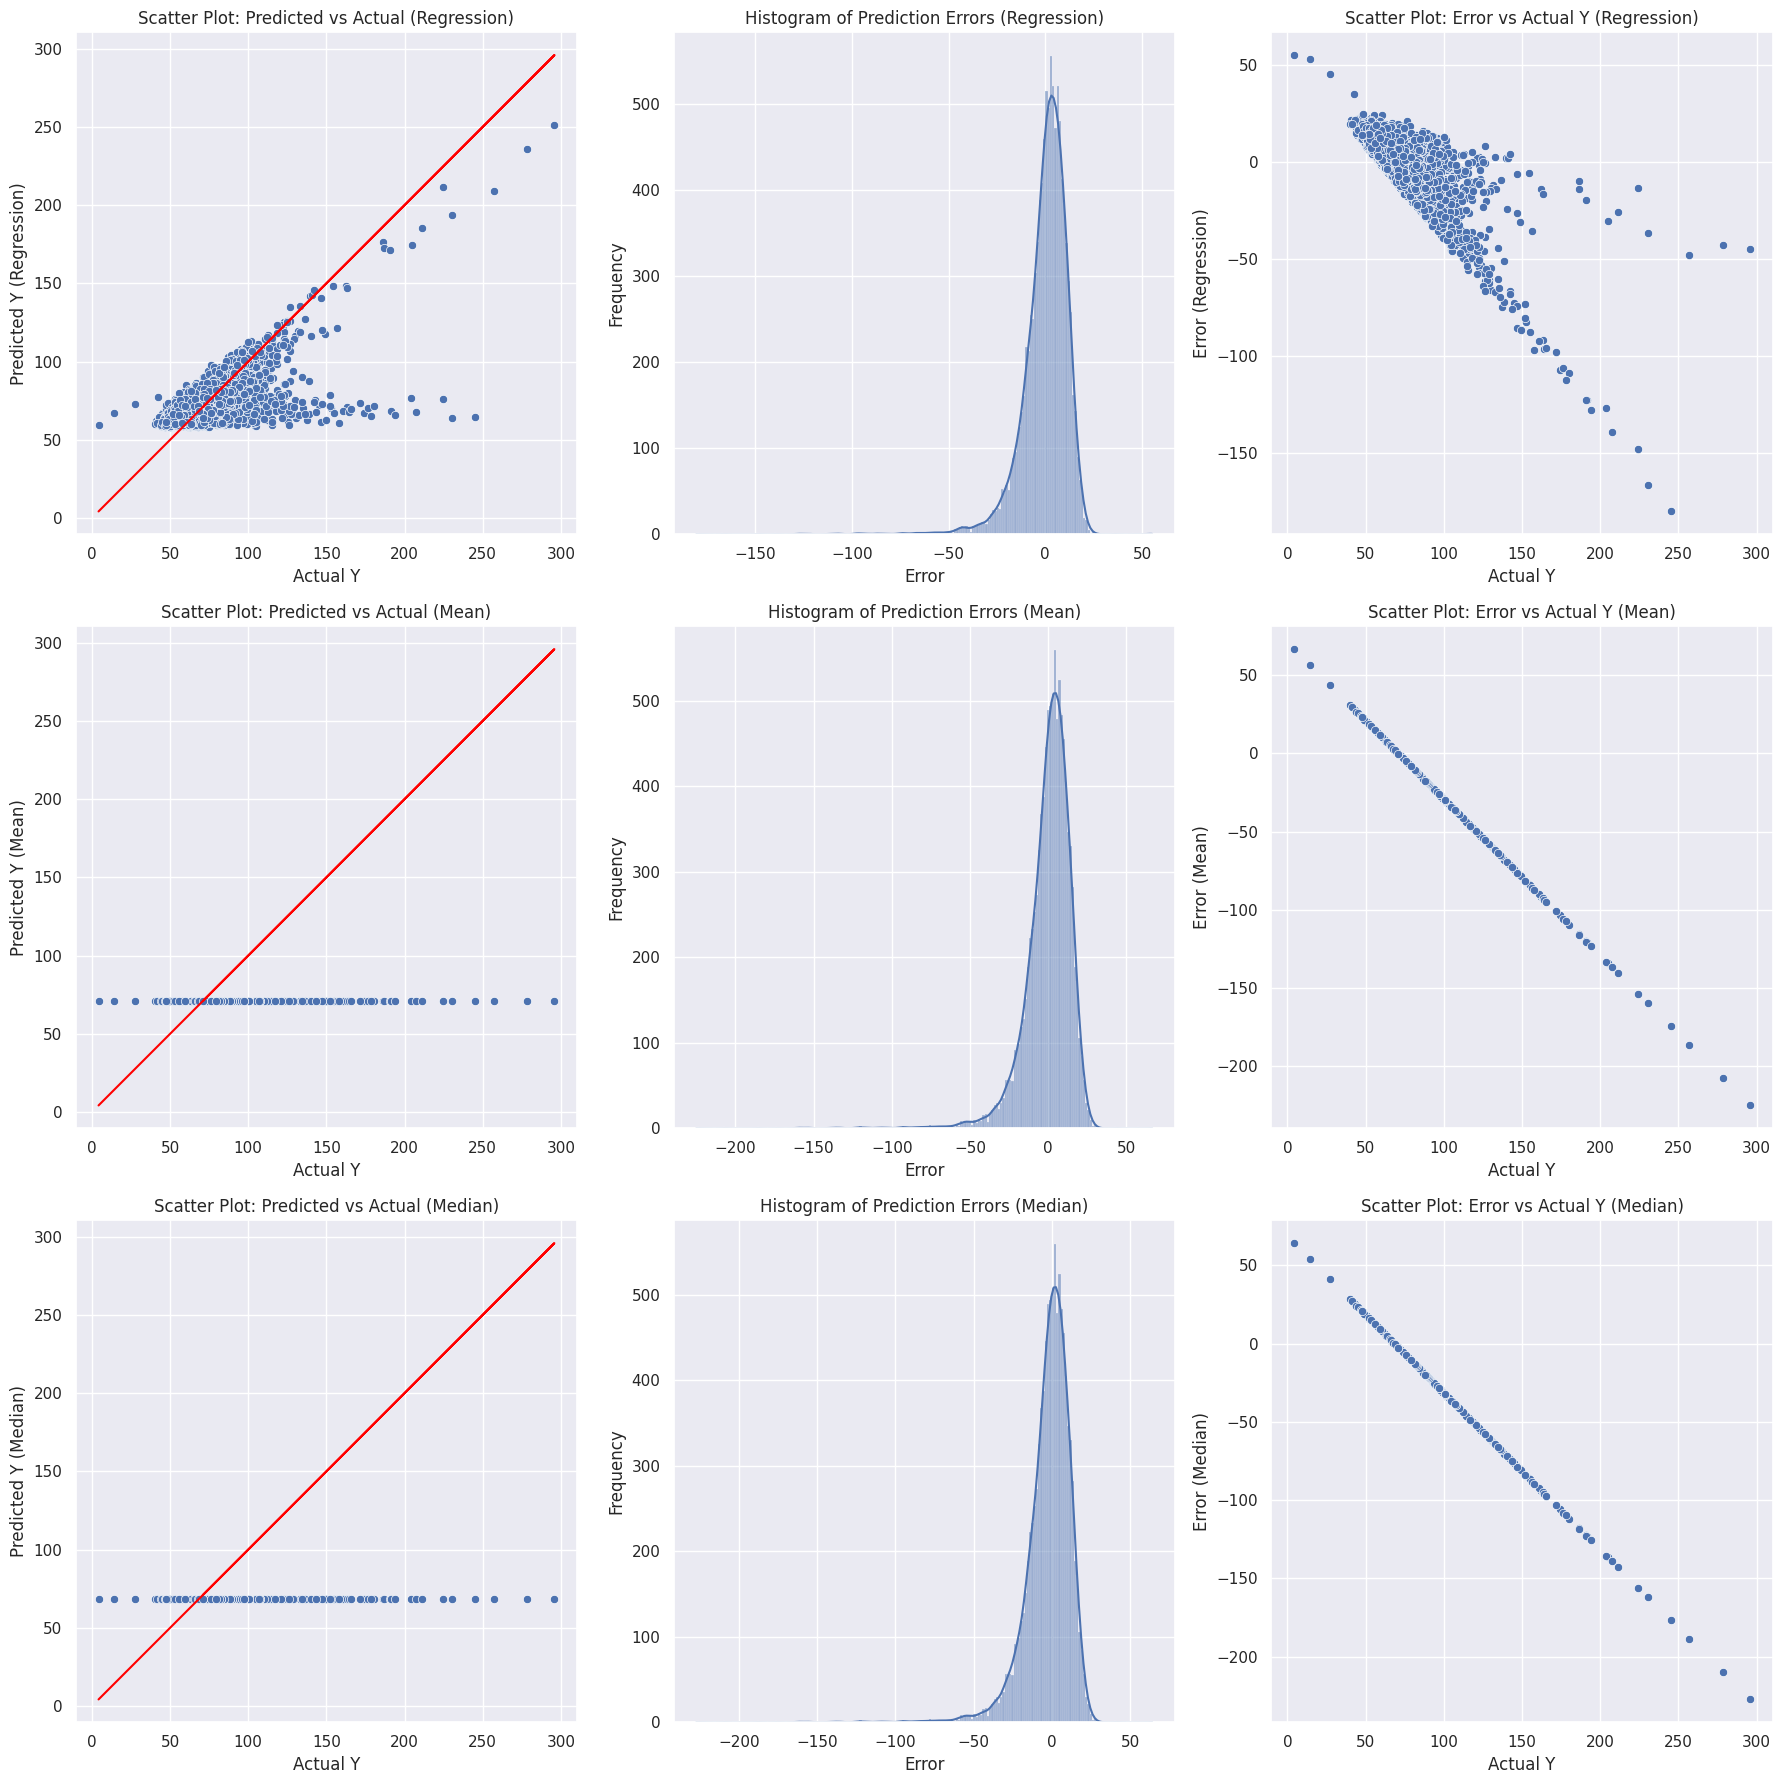

RMSE of prediction (Regression): 8.340560952673215
RMSE of prediction (Mean): 10.368997026758262
RMSE of prediction (Median): 10.178296423599468


In [43]:
foo_regresion(X,Y)

Ahora tratemos de mejorar nuestro modelo solo utilizando/creando variables polinomiales de nuestras X's y veamos si mejora.

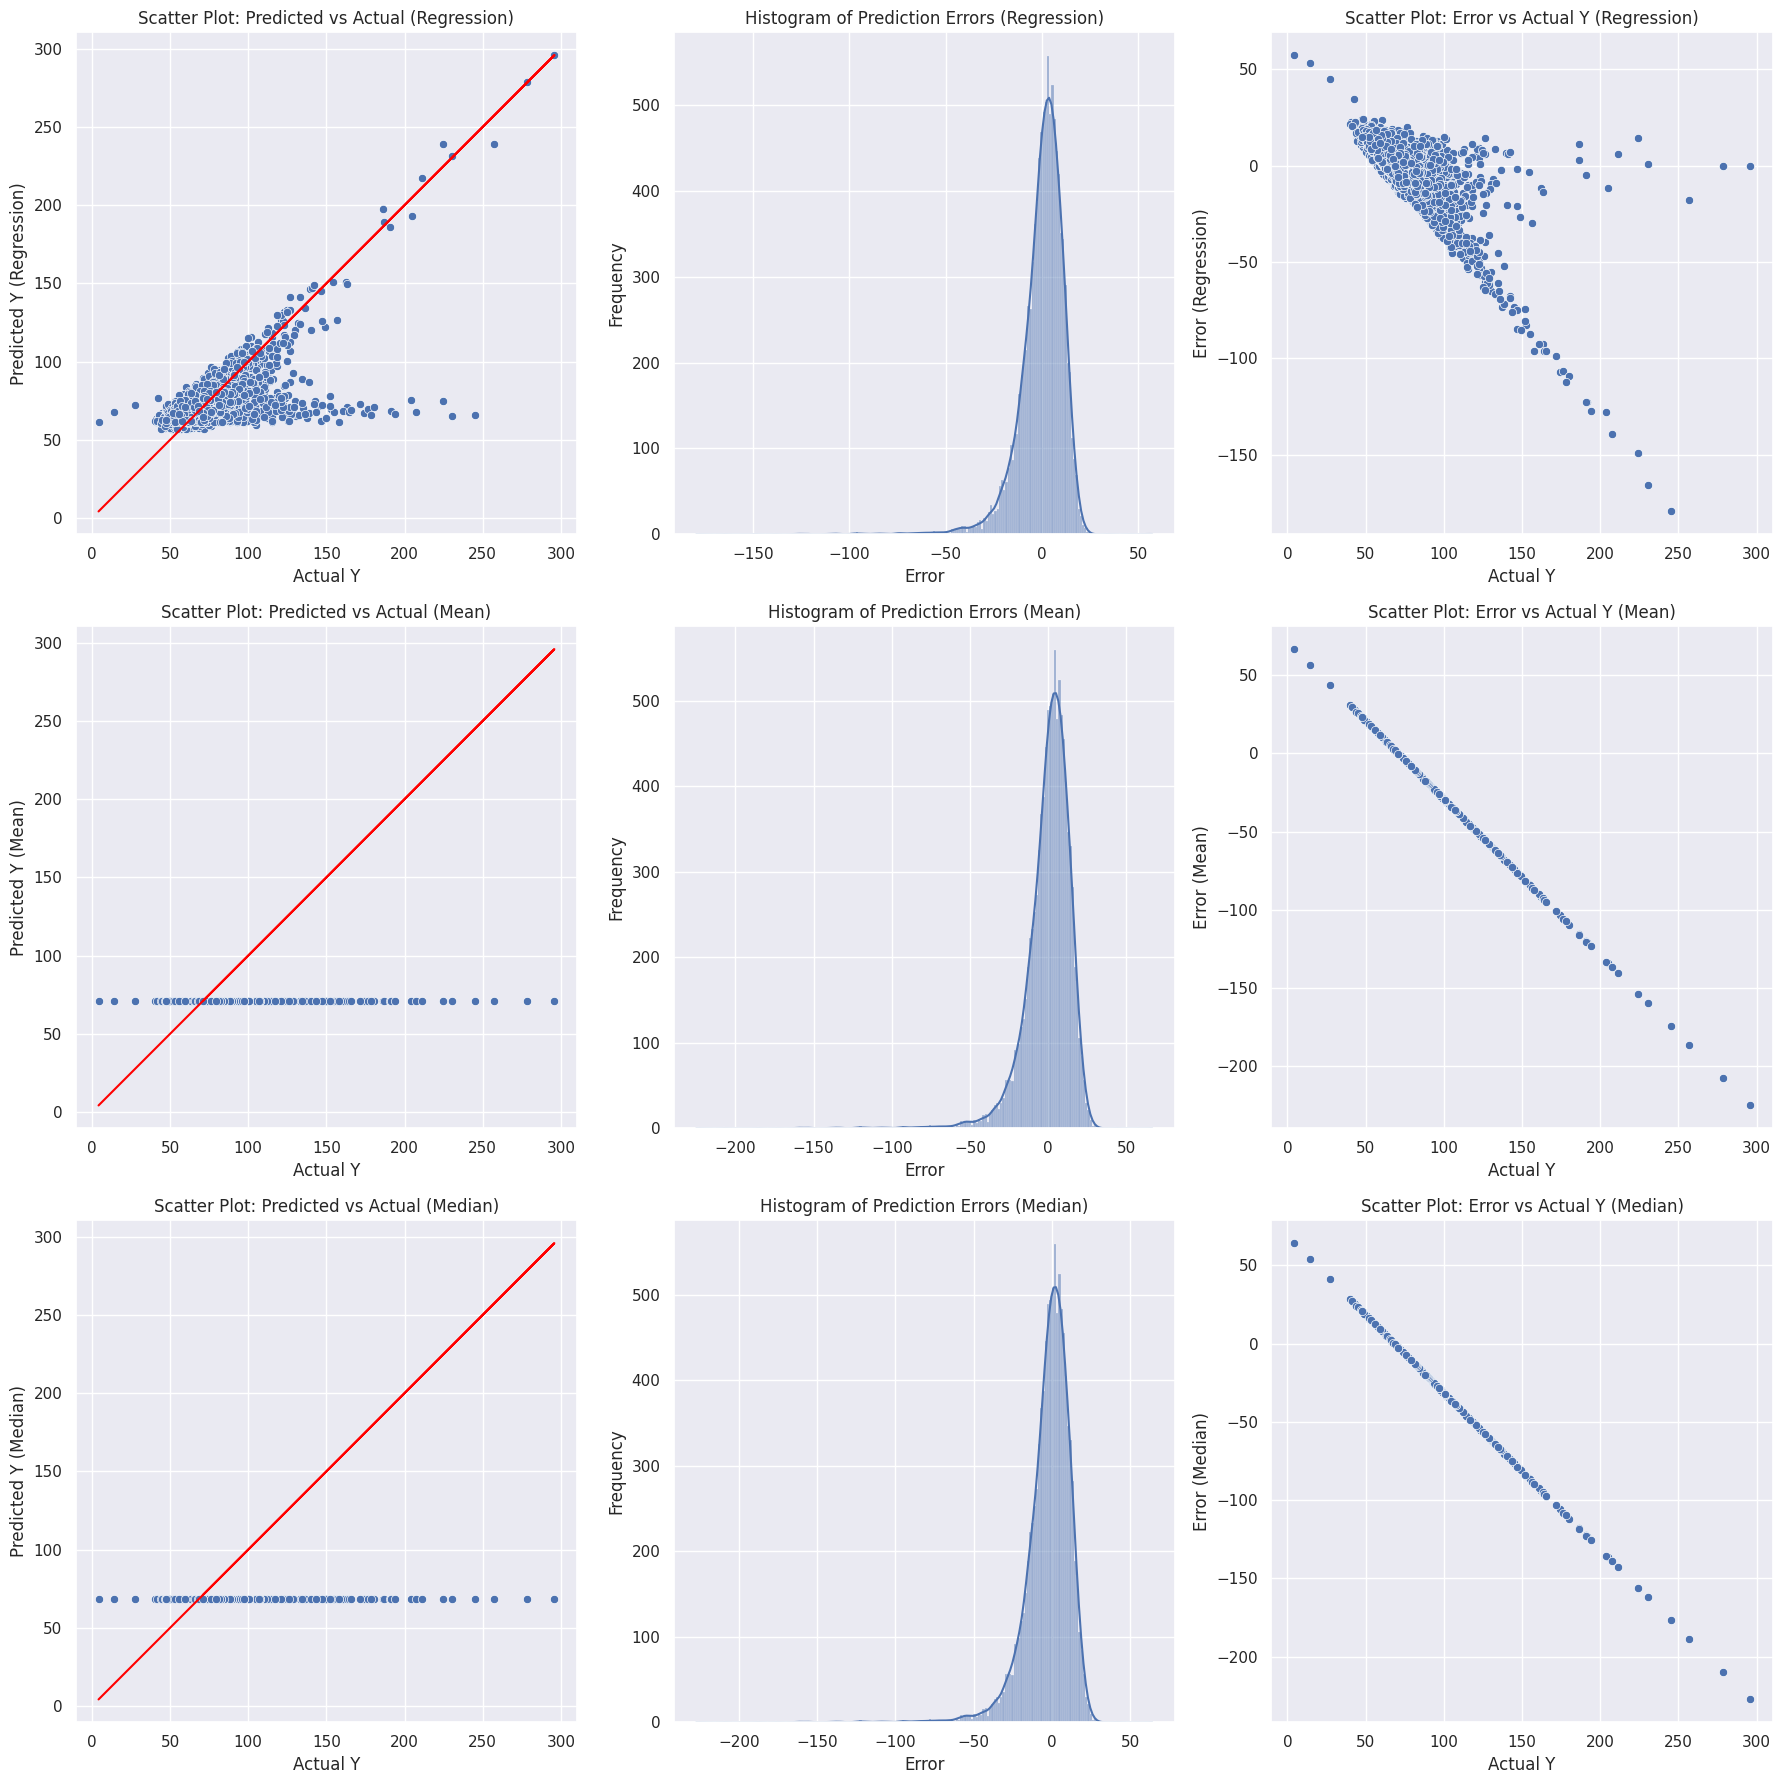

RMSE of prediction (Regression): 8.296158530905707
RMSE of prediction (Mean): 10.368997026758262
RMSE of prediction (Median): 10.178296423599468


In [44]:
X2 = X.copy()

#Ingenieria de Variables
power = [1 + n/2 for n in range(1,10)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

+ Que esta pasando, pq no mejora tanto el modelo?

# Tarea

1. Juega con las funciones, datos y transformaciones del notebook para que los conceptos queden claros
2. Responde las preguntas que se encuntra a lo largo del notebook
3. Responde las siguientes preguntas
4. Envia el notebook de Tarea con:
   1. (4 ultimos digitos de tu CU)\_(tu nombre)\_(nombre del notebook)
      1. Por ejemplo: `7252_mario_03_limits_of_linear_regression.ipynb`


## Preguntas

1. Como sabes que el modelo es bueno o malo, que criterio utilizarias?

Respuesta:

2. Si no pudieras graficar como sabrias si el modelo es bueno o malo?

Respuesta:

3. Da una regla lo mas "universal" o "general" posible para poder definir si tu modelo es bueno o malo. Piensa:
   1. En abstracto / Matematicamente: (Piensa en una regla general que podria aplicar a cualquier problema)
   2. En un problema real/aplicado : (Cual es un RMSE bueno:1,2, .4?)

Respuesta:

4. Si tuvieras un fenomeno dado por:   
    
$f(x) = y =
\begin{cases}
5 & \text{si } x \text{ es par} \\
0 & \text{if } x \text{ es impar}
\end{cases}
$  
Habria forma de aproximar el problema utilizando solo polinomios (modelo lineal con transformaciones exponenciales de las variables). Piensa como es el fenomeno y que esta pasando en cada caso.
Realiza una explicacion de que pasaria con tu modelo polinomial en cada caso.

Piensa en dos escenarios:
+ Interpolacion

+ Extrapolacion

Respuesta: